# Visualizing Networks

In [1]:
# import
%matplotlib notebook
%config Completer.use_jedi = False

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite
import seaborn as sns
from tqdm import tqdm

from joblib import Parallel, Memory, delayed

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

# read in the graph 
G = nx.read_gpickle('major_us_cities')

%matplotlib notebook

In [2]:
# DV fraud for 16-th
fraud_ips = pd.read_csv('ip_list_1606.csv', header=None)
fraud_ips.columns = ['ip']

## Bipartite Graph -> IP, DeviceId

### Amagi Ads +

In [38]:
df = pd.read_csv('amagi_ip_devId.csv')
df = df[~df.dev_id.isin({'0000-0000-0000-0000', '00000000-0000-0000-0000-000000000000', 'REPLACE_ME', 'NULL'})]
df = df[['ip', 'dev_id']]

In [39]:
# Create the Bipartite Graph
B = nx.Graph()
B.add_nodes_from(set(df.ip), bipartite=0)
B.add_nodes_from(set(df.dev_id), bipartite=1)

# Add edges between IP and Devices 
B.add_edges_from(list(df.itertuples(index=False, name=None)))

bipartite.is_bipartite(B) # Check if Bipartite

True

In [40]:
X = set(df.ip.unique())            # IPs are one set of bipartite nodes
P = bipartite.-(B, X)  # Weighted Projected Graphs

In [41]:
comps = list(P.subgraph(c) for c in nx.connected_components(P))

In [42]:
comp_nodes = np.array(list(map(lambda x: len(x), comps)))
comp_nodes[comp_nodes>15]

array([ 17, 404, 268, 348,  19,  52,  50,  98,  36,  29,  25,  17,  38,
        22,  16,  20,  22,  16,  18,  35,  26,  28,  77, 138,  30,  26,
        16,  42,  18,  21,  20,  37,  21,  17,  23,  20,  19])

In [7]:
idx = np.argwhere(comp_nodes>15).flatten()
idx

array([  26,   44,   67,   71,   84,   87,  104,  187,  189,  270,  287,
        323,  399,  414,  415,  433,  464,  544,  590,  650,  684,  829,
        844,  871,  919, 1098, 1229, 1350, 1353, 1658, 1808, 2056, 2118,
       2207, 3800, 4693, 5193])

In [ ]:
# G.edges(data=True)

<IPython.core.display.Javascript object>


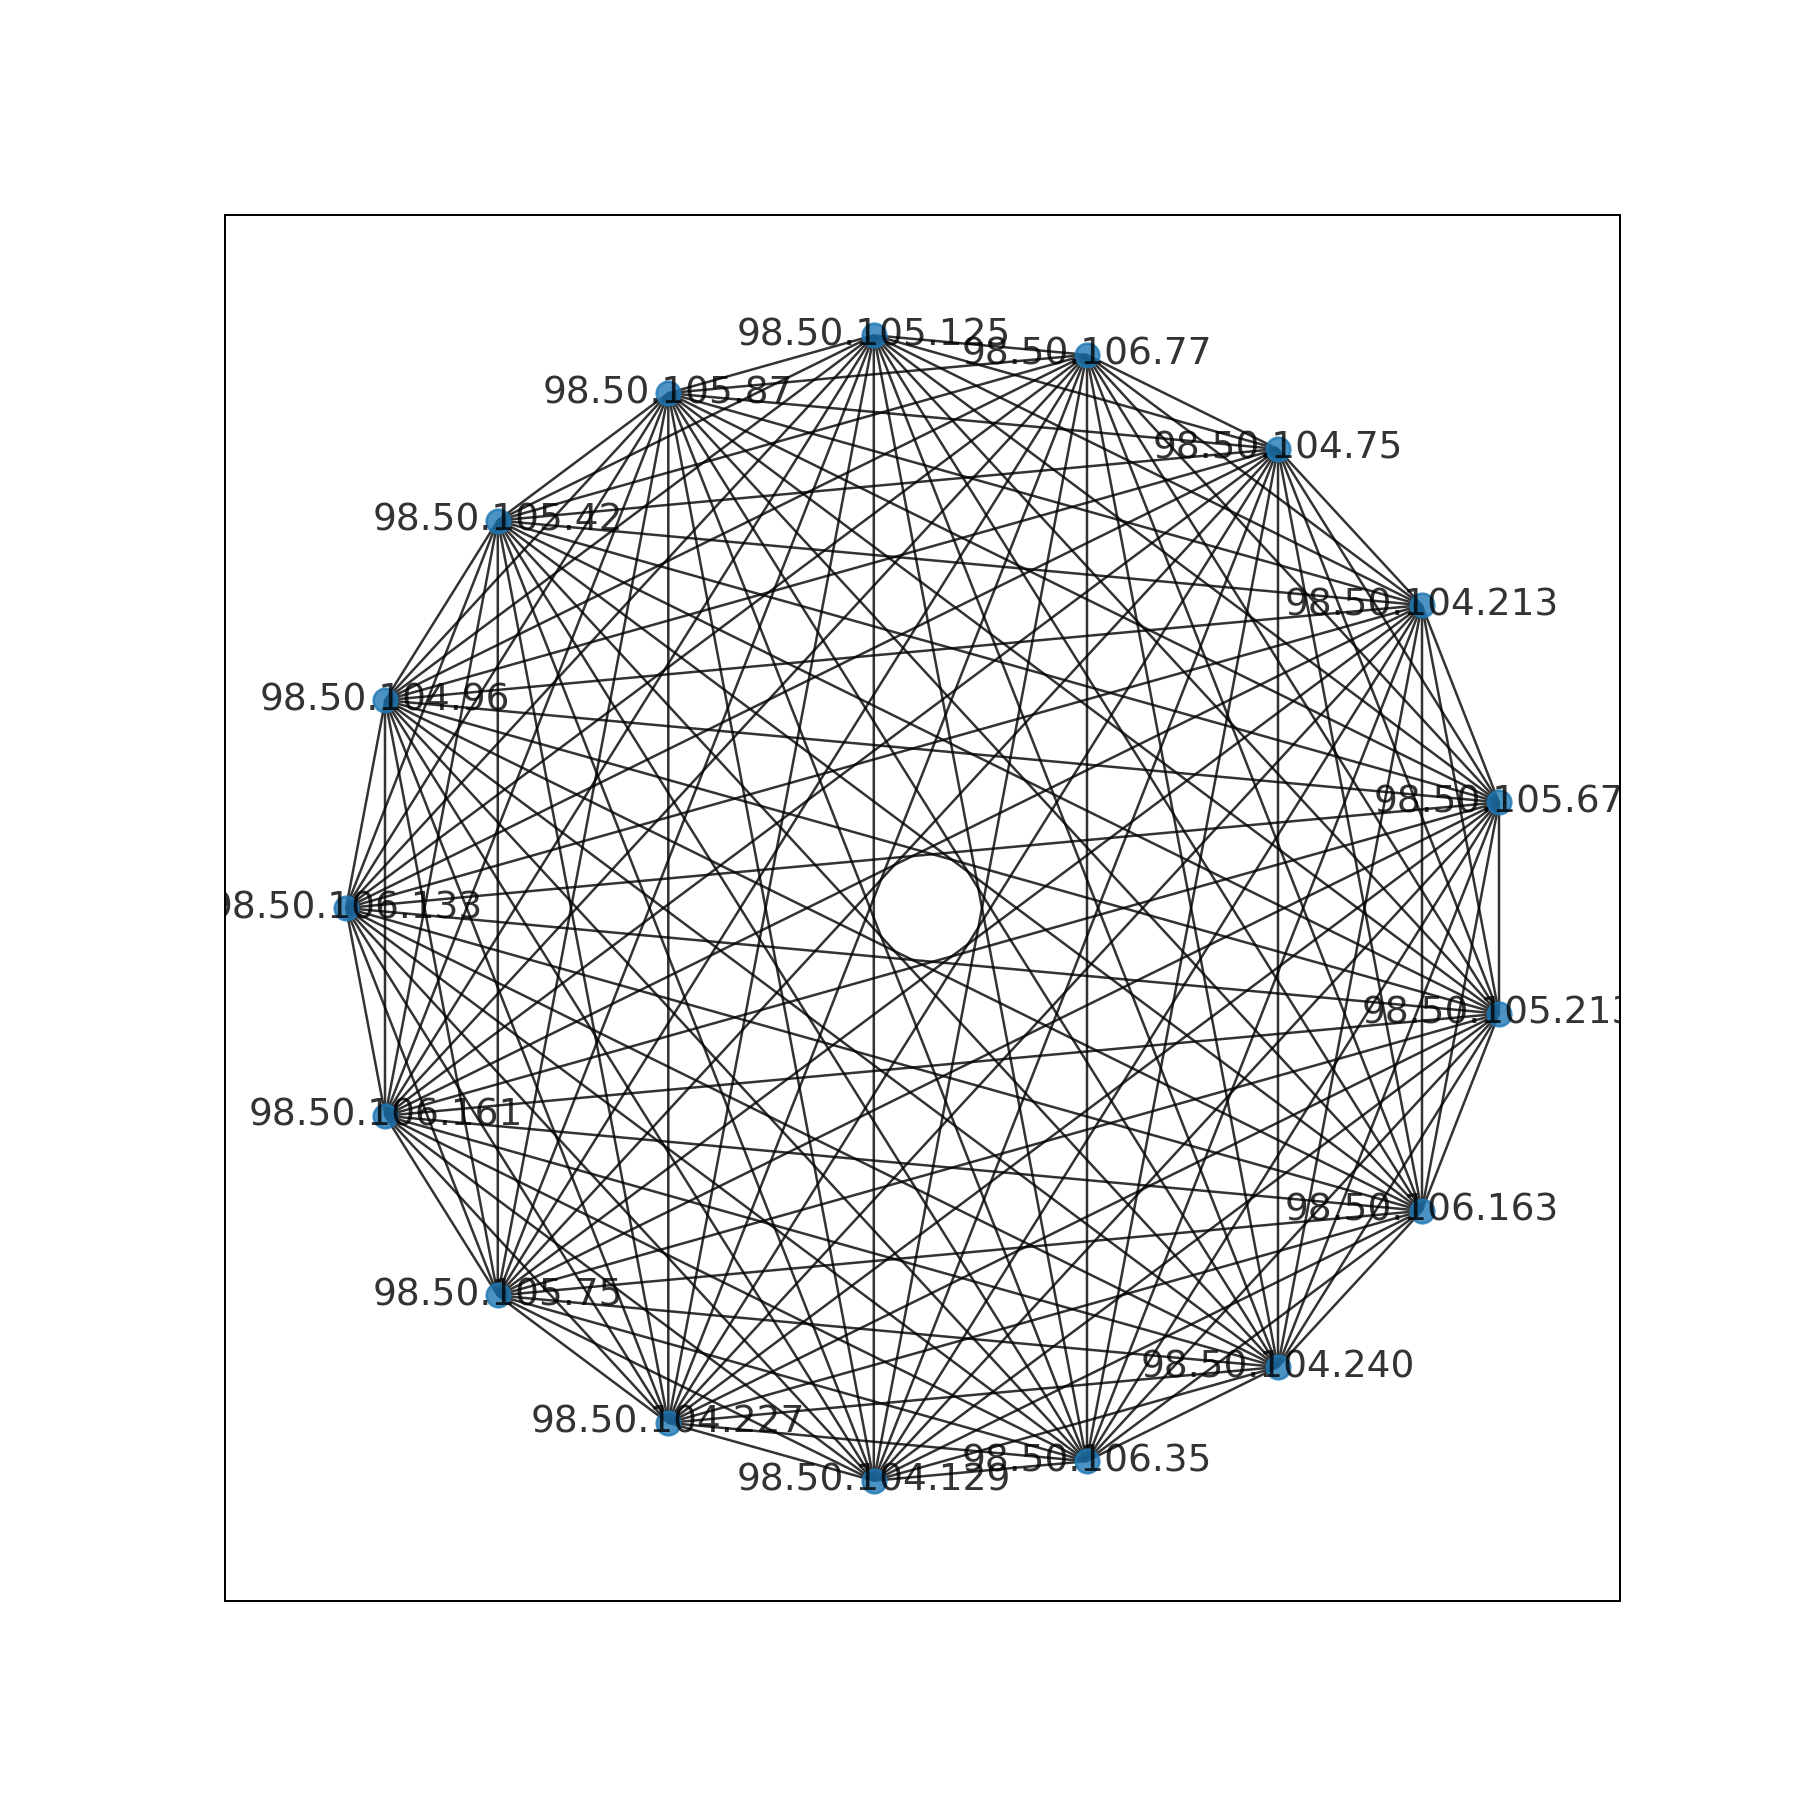

<bound method _make_class_factory.<locals>.class_factory.<locals>.subcls.set of <AxesSubplot:>>

In [50]:
fig, ax = plt.subplots(1, figsize=(10,10))

G = comps[26].copy()

pos = nx.shell_layout(G)
nx.draw_networkx(G, pos, font_size=15, node_size=90, alpha=0.8)

<IPython.core.display.Javascript object>


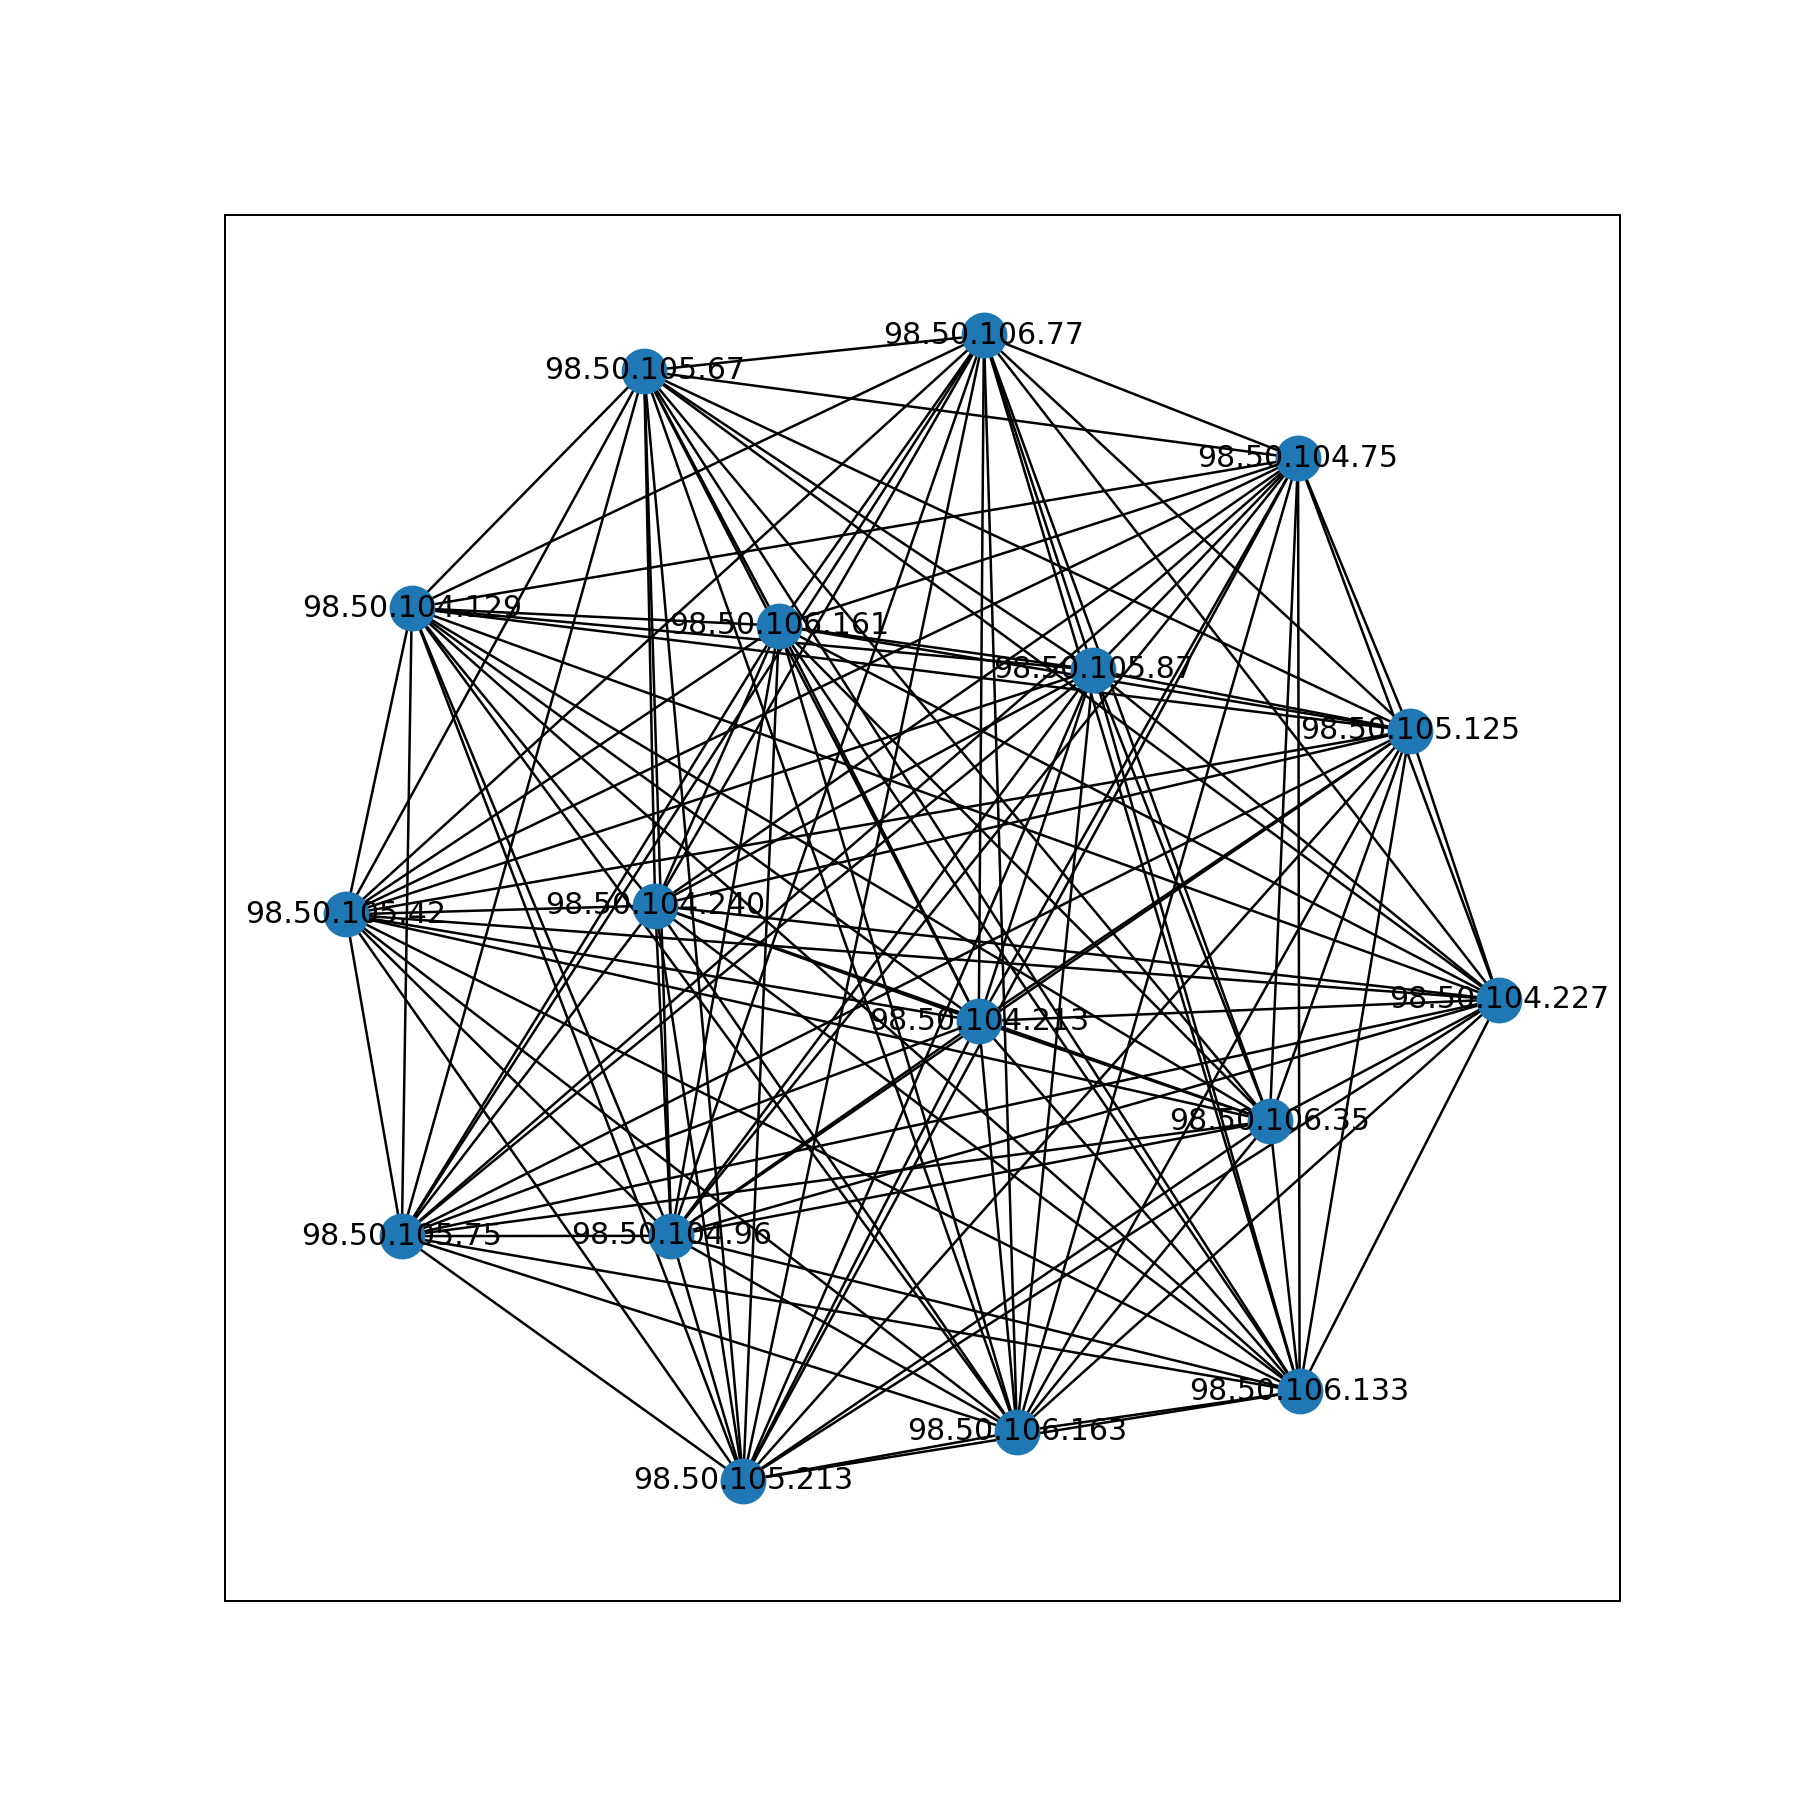

In [44]:
fig, ax = plt.subplots(1, figsize=(10,10))

G = comps[26].copy()

pos = nx.fruchterman_reingold_layout(G)
nx.draw_networkx(G, pos)

### 47 Samurai

In [3]:
df = pd.read_csv('47_Samurai_ip_devId.csv')
df = df[~df.dev_id.isin({'au-fetch-stb-0001', '00000000-0000-0000-0000-000000000000', 'REPLACE_ME', 'NULL'})]
df = df[['ip', 'dev_id']]

In [4]:
df

ip  \
0                               189.15.22.189   
1                              191.55.244.223   
2                                172.56.14.24   
3                                172.56.15.75   
4                                  65.33.71.0   
...                                       ...   
15995                          172.58.105.147   
15996                           67.172.59.174   
15997   2601:547:801:3f80:a837:1874:e6f5:8afd   
15998  2601:5c5:8301:7b50:2d68:f70b:45fc:de45   
15999  2601:5c5:8301:7b50:e0da:2be7:4df1:1010   

                                         dev_id  
0          33c73256-9ff1-2e89-05b8-11f1526ba2ee  
1          33c73256-9ff1-2e89-05b8-11f1526ba2ee  
2          704ab88d-6235-4e63-9495-d19987c5d2ba  
3          704ab88d-6235-4e63-9495-d19987c5d2ba  
4          7d00636e-7c91-4156-8911-744bb1b5201a  
...                                         ...  
15995      c5c3c8dd-a990-5793-bdcf-2b627298e08a  
15996      e284059e-1984-4838-bb73-d781d7ce4d0e  
15997      e284059e-1984-4838-bb73-d781d7ce4d0e  
15998  jSXQlQjZpxZoWXSjIZvN9UAbrZnWDiGkEYRZZLRQ  
15999  jSXQlQjZpxZoWXSjIZvN9UAbrZnWDiGkEYRZZLRQ  

[11456 rows x 2 columns]

In [20]:
df.dev_id.value_counts()

74412476-da0c-9459-9206-ae264a20328f        151
8e949407-492a-4c22-a7f0-f255e626fe81        146
57fe6858-07b2-487f-9a92-6130822490a1        141
9567e6be-06ca-4b23-8fe4-359122fa127b         85
3d9c5203-1d32-4aad-b170-832571e73e78         82
                                           ... 
650b0aae-0fce-4850-a1ff-51fa9cd8a4bb          2
7a5063b4-a283-9144-b41f-55edd8d6bdb0          2
90edd71e-9b66-4185-bf0f-258772b10a5f          2
1d081b62-793c-5ddf-9827-bb3363fef168          2
jSXQlQjZpxZoWXSjIZvN9UAbrZnWDiGkEYRZZLRQ      2
Name: dev_id, Length: 4507, dtype: int64

In [21]:
# Create the Bipartite Graph
B = nx.Graph()
B.add_nodes_from(set(df.ip), bipartite=0)
B.add_nodes_from(set(df.dev_id), bipartite=1)

# Add edges between IP and Devices 
B.add_edges_from(list(df.itertuples(index=False, name=None)))

bipartite.is_bipartite(B) # Check if Bipartite

True

#### Weighted Projection of Bipartite Graph

In [7]:
X = set(df.ip.unique())            # IPs are one set of bipartite nodes
P = bipartite.weighted_projected_graph(B, X)  # Weighted Projected Graphs

In [22]:
comps = list(P.subgraph(c) for c in nx.connected_components(P))

In [23]:
comp_nodes = np.array(list(map(lambda x: len(x), comps)))
comp_nodes[comp_nodes>15]

array([ 26, 157,  88,  50,  29,  58,  22,  20,  45,  32, 146, 146,  36,
        69,  54,  82,  28,  43,  49,  31,  24,  26,  22,  55,  30,  22,
        22,  25,  23,  24,  18])

In [10]:
[i for i in range(len(comps)) if '45.32.3.150' in comps[i]]

[1008]

In [12]:
G1 = comps[1008].copy()

In [43]:
383893 - comp_nodes.sum(), (383893 - comp_nodes.sum())/383893

(372903, 0.9713722313248744)

In [ ]:
400000 - 370000

<IPython.core.display.Javascript object>


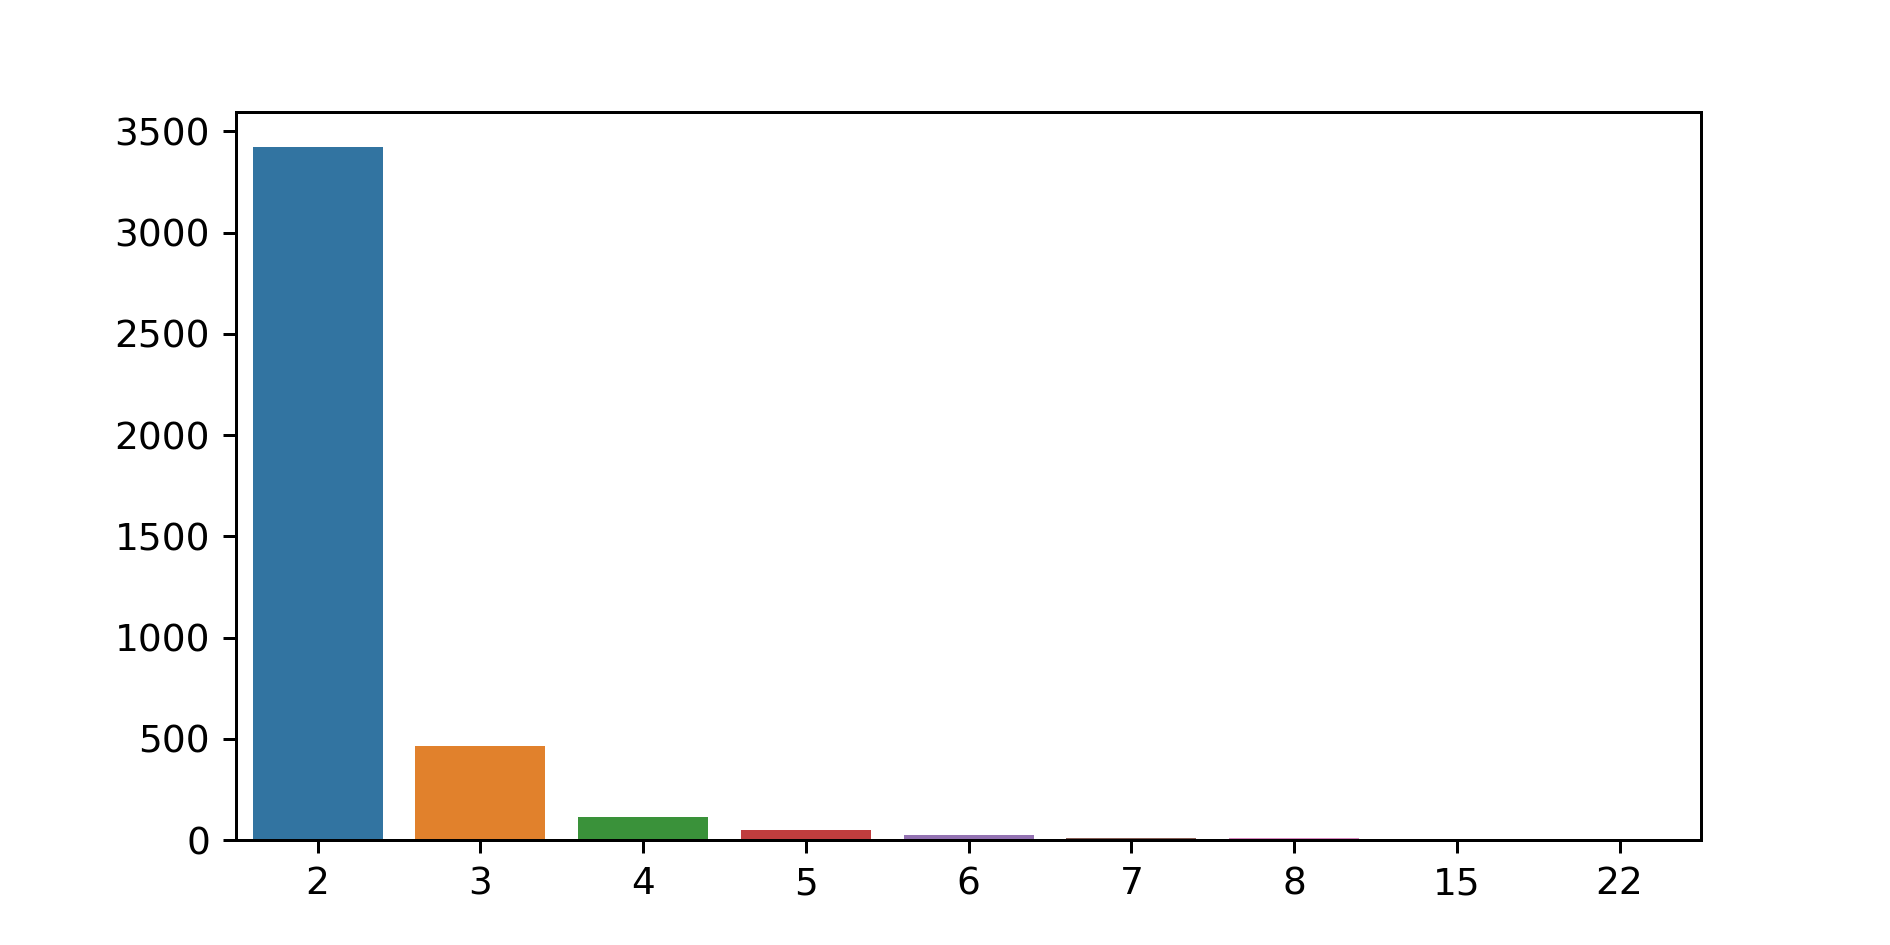

In [41]:
# Graph sizes plot
s = pd.Series(comp_nodes).value_counts()
s = s.iloc[:9].sort_index()

fig, ax = plt.subplots(figsize=(7, 3.5), dpi=150)
sns.barplot(x=s.index.astype(int), y=s)

# %matplotlib notebook
fig.show()

In [ ]:
400000

In [ ]:
IP   device
ip1.  dev1
ip2.  dev2
ip1.  dev2

In [ ]:
device ip

IP - devices - IPs - devices - IPs

<font size="3.9">__Graph Features__

1. The size of the graph the IP is a part of.
2. Degree Centrality of the node (IP) in the graph.
3. Max weight of edges connected to the node (IP) 

<IPython.core.display.Javascript object>


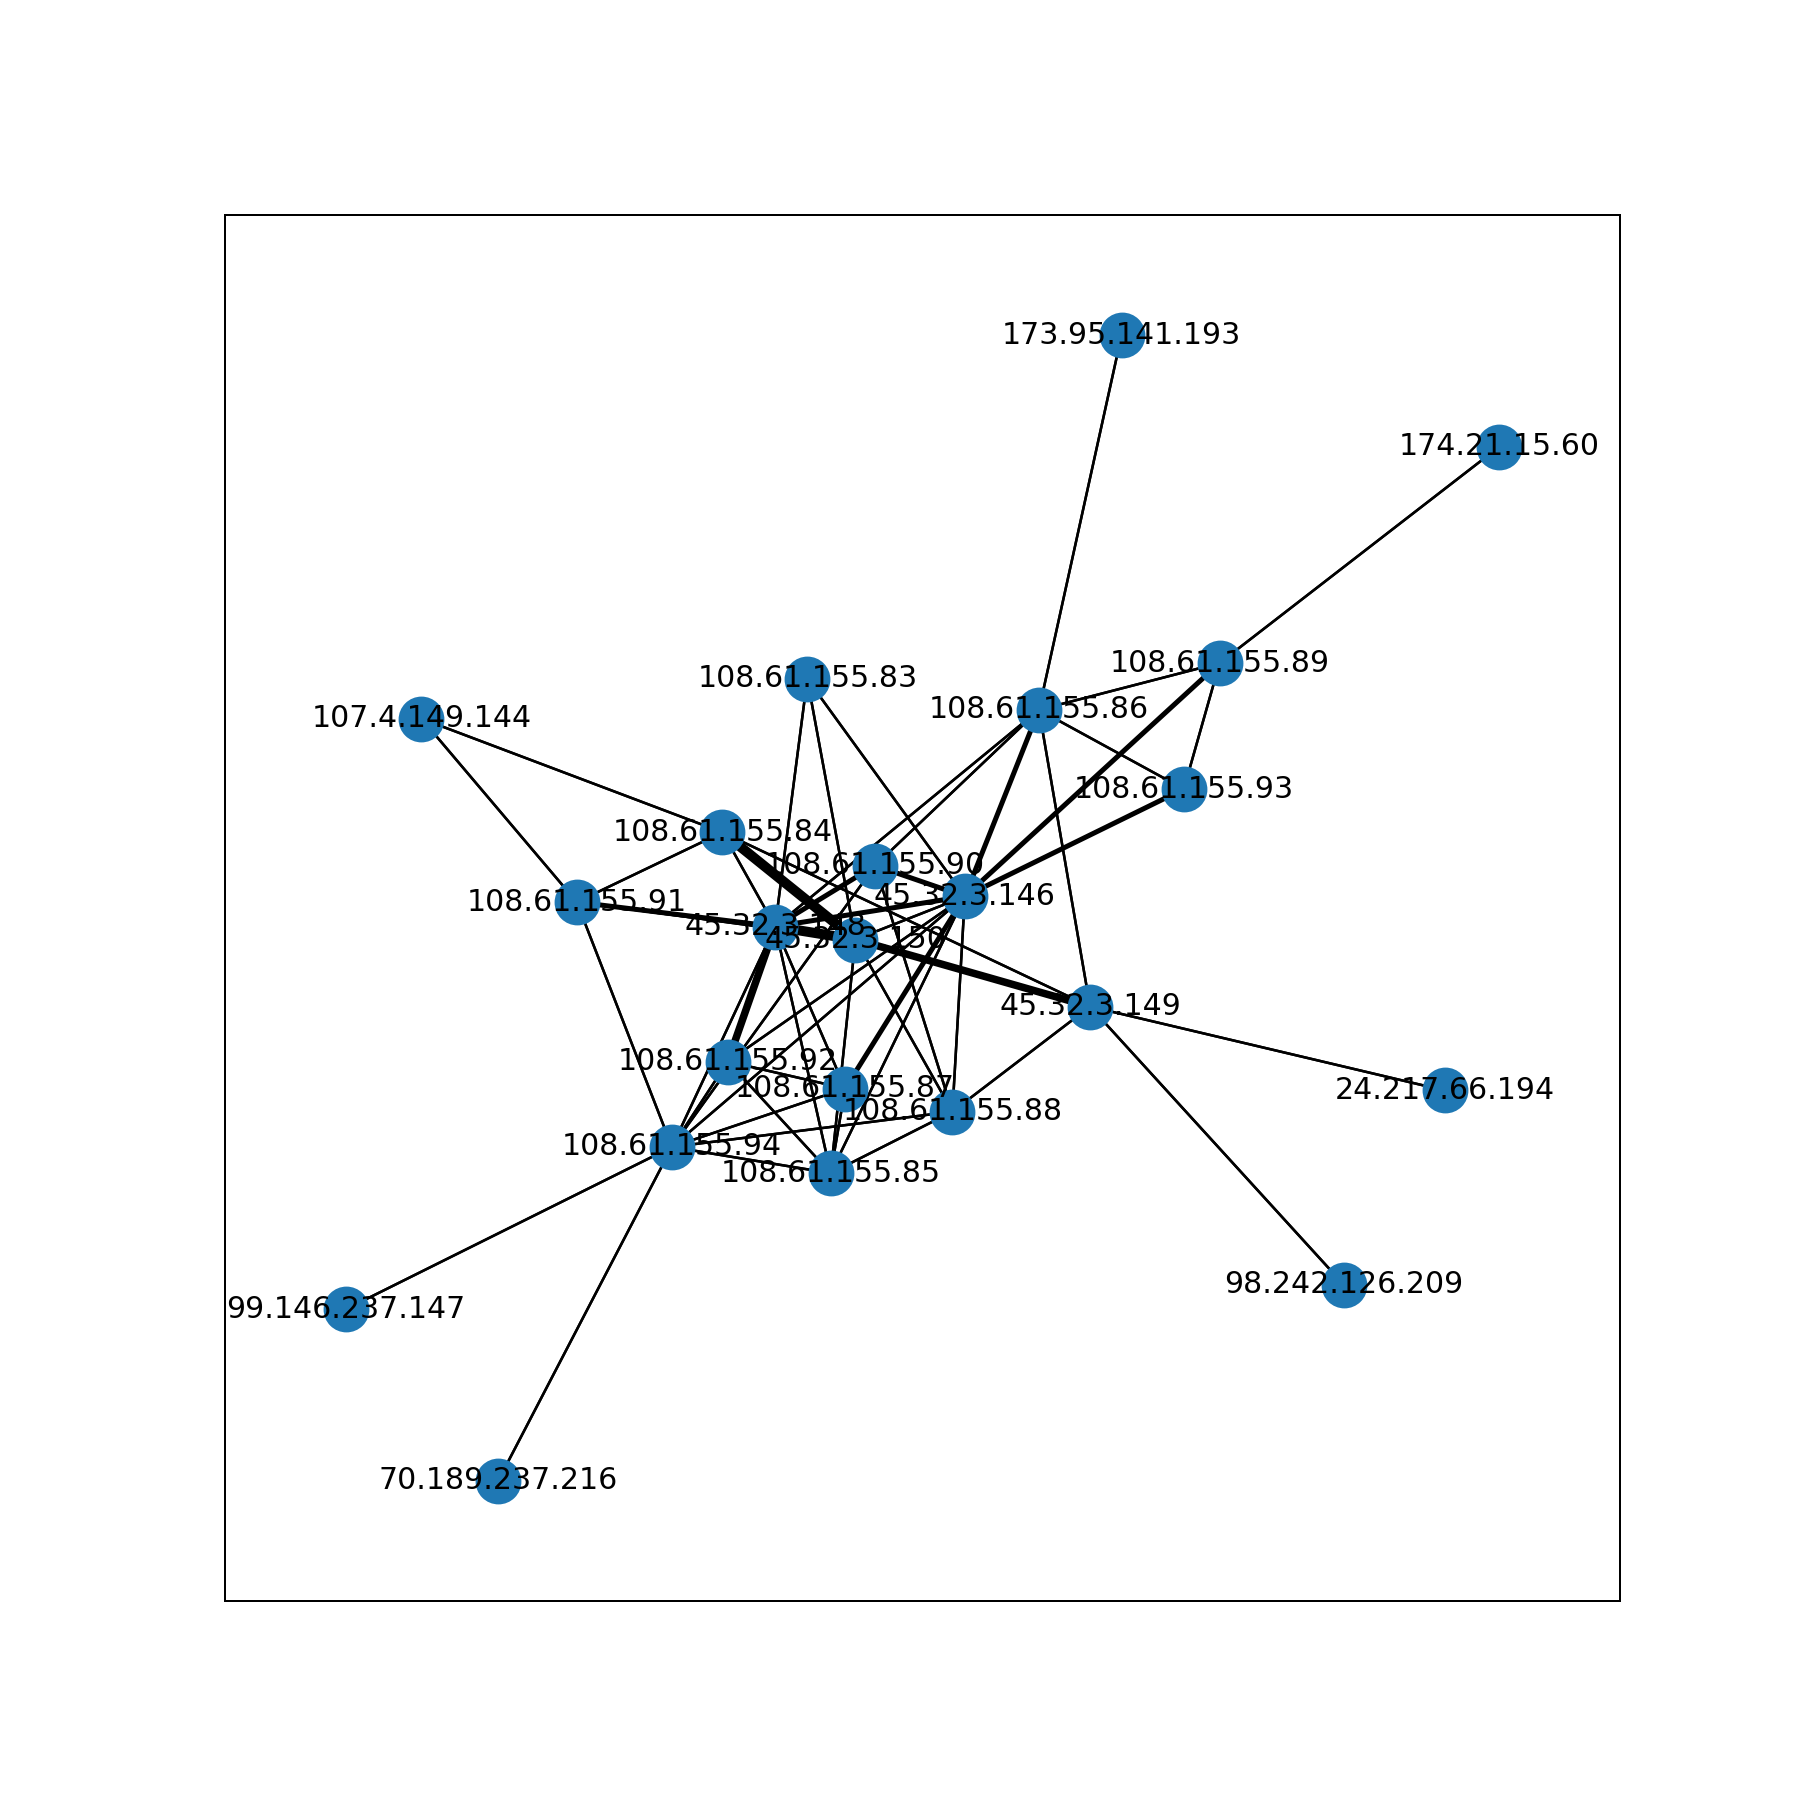

In [12]:
fig, ax = plt.subplots(1, figsize=(10,10))

pos1 = nx.fruchterman_reingold_layout(G1)
nx.draw_networkx(G1, pos1)

for edge in G1.edges(data='weight'):
    nx.draw_networkx_edges(G1, pos1, edgelist=[edge], width=edge[2])

<IPython.core.display.Javascript object>


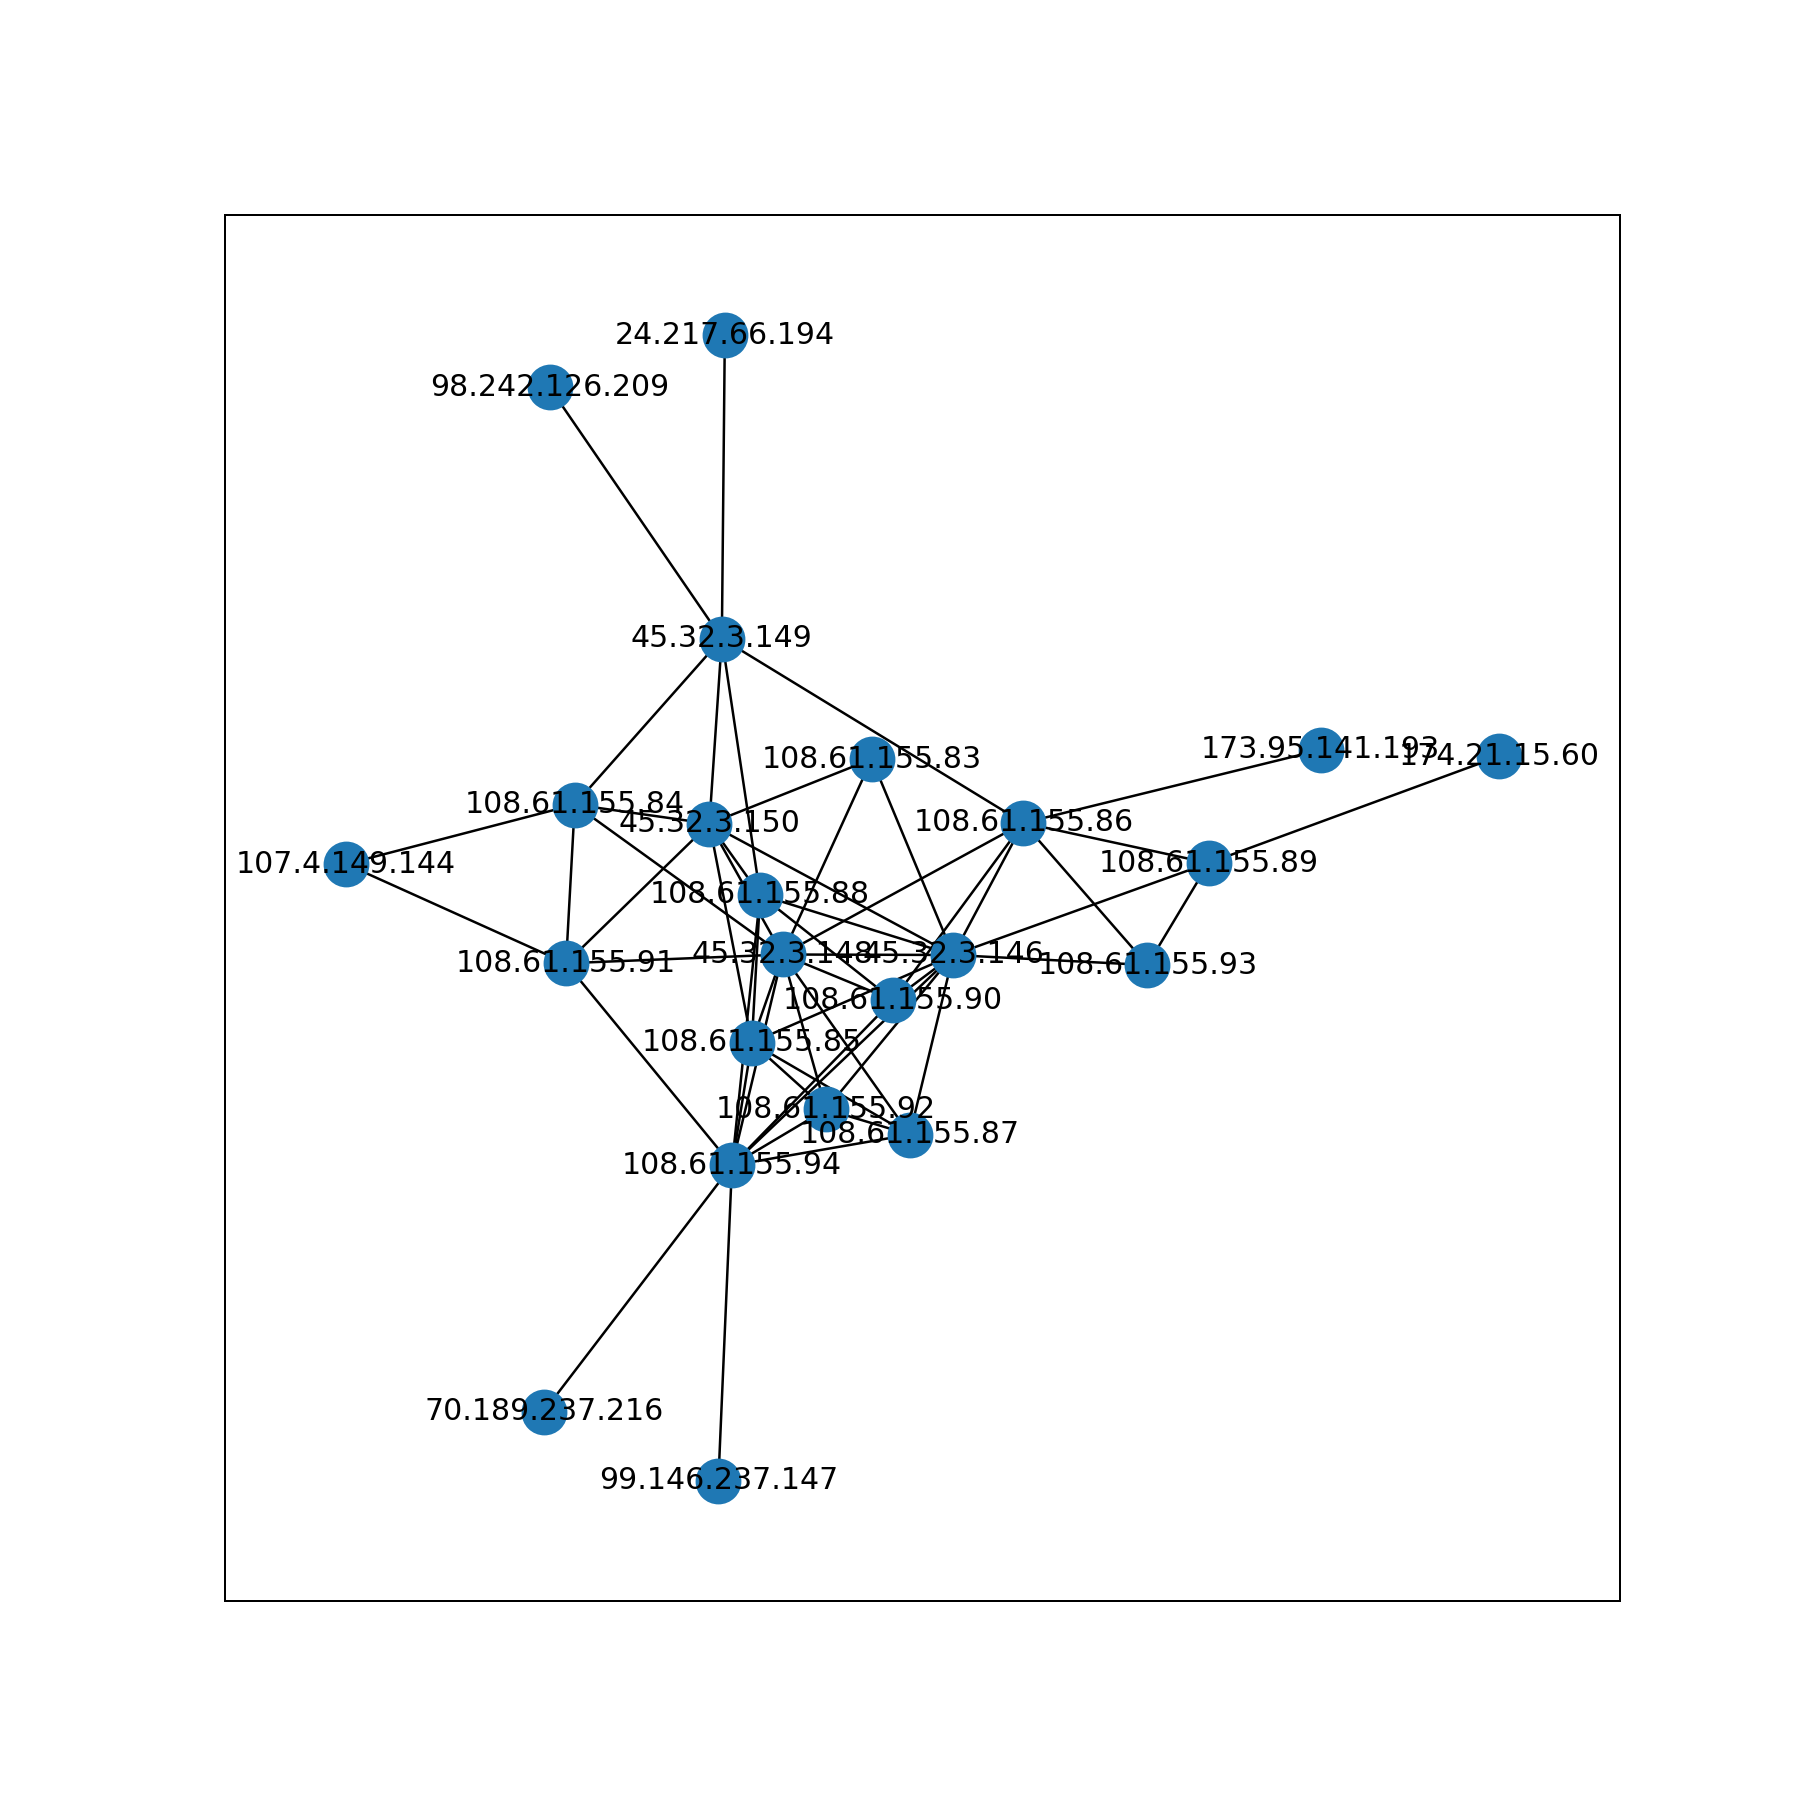

In [35]:
fig, ax = plt.subplots(1, figsize=(10,10))

pos1 = nx.fruchterman_reingold_layout(G1)
nx.draw_networkx(G1, pos1)

<IPython.core.display.Javascript object>


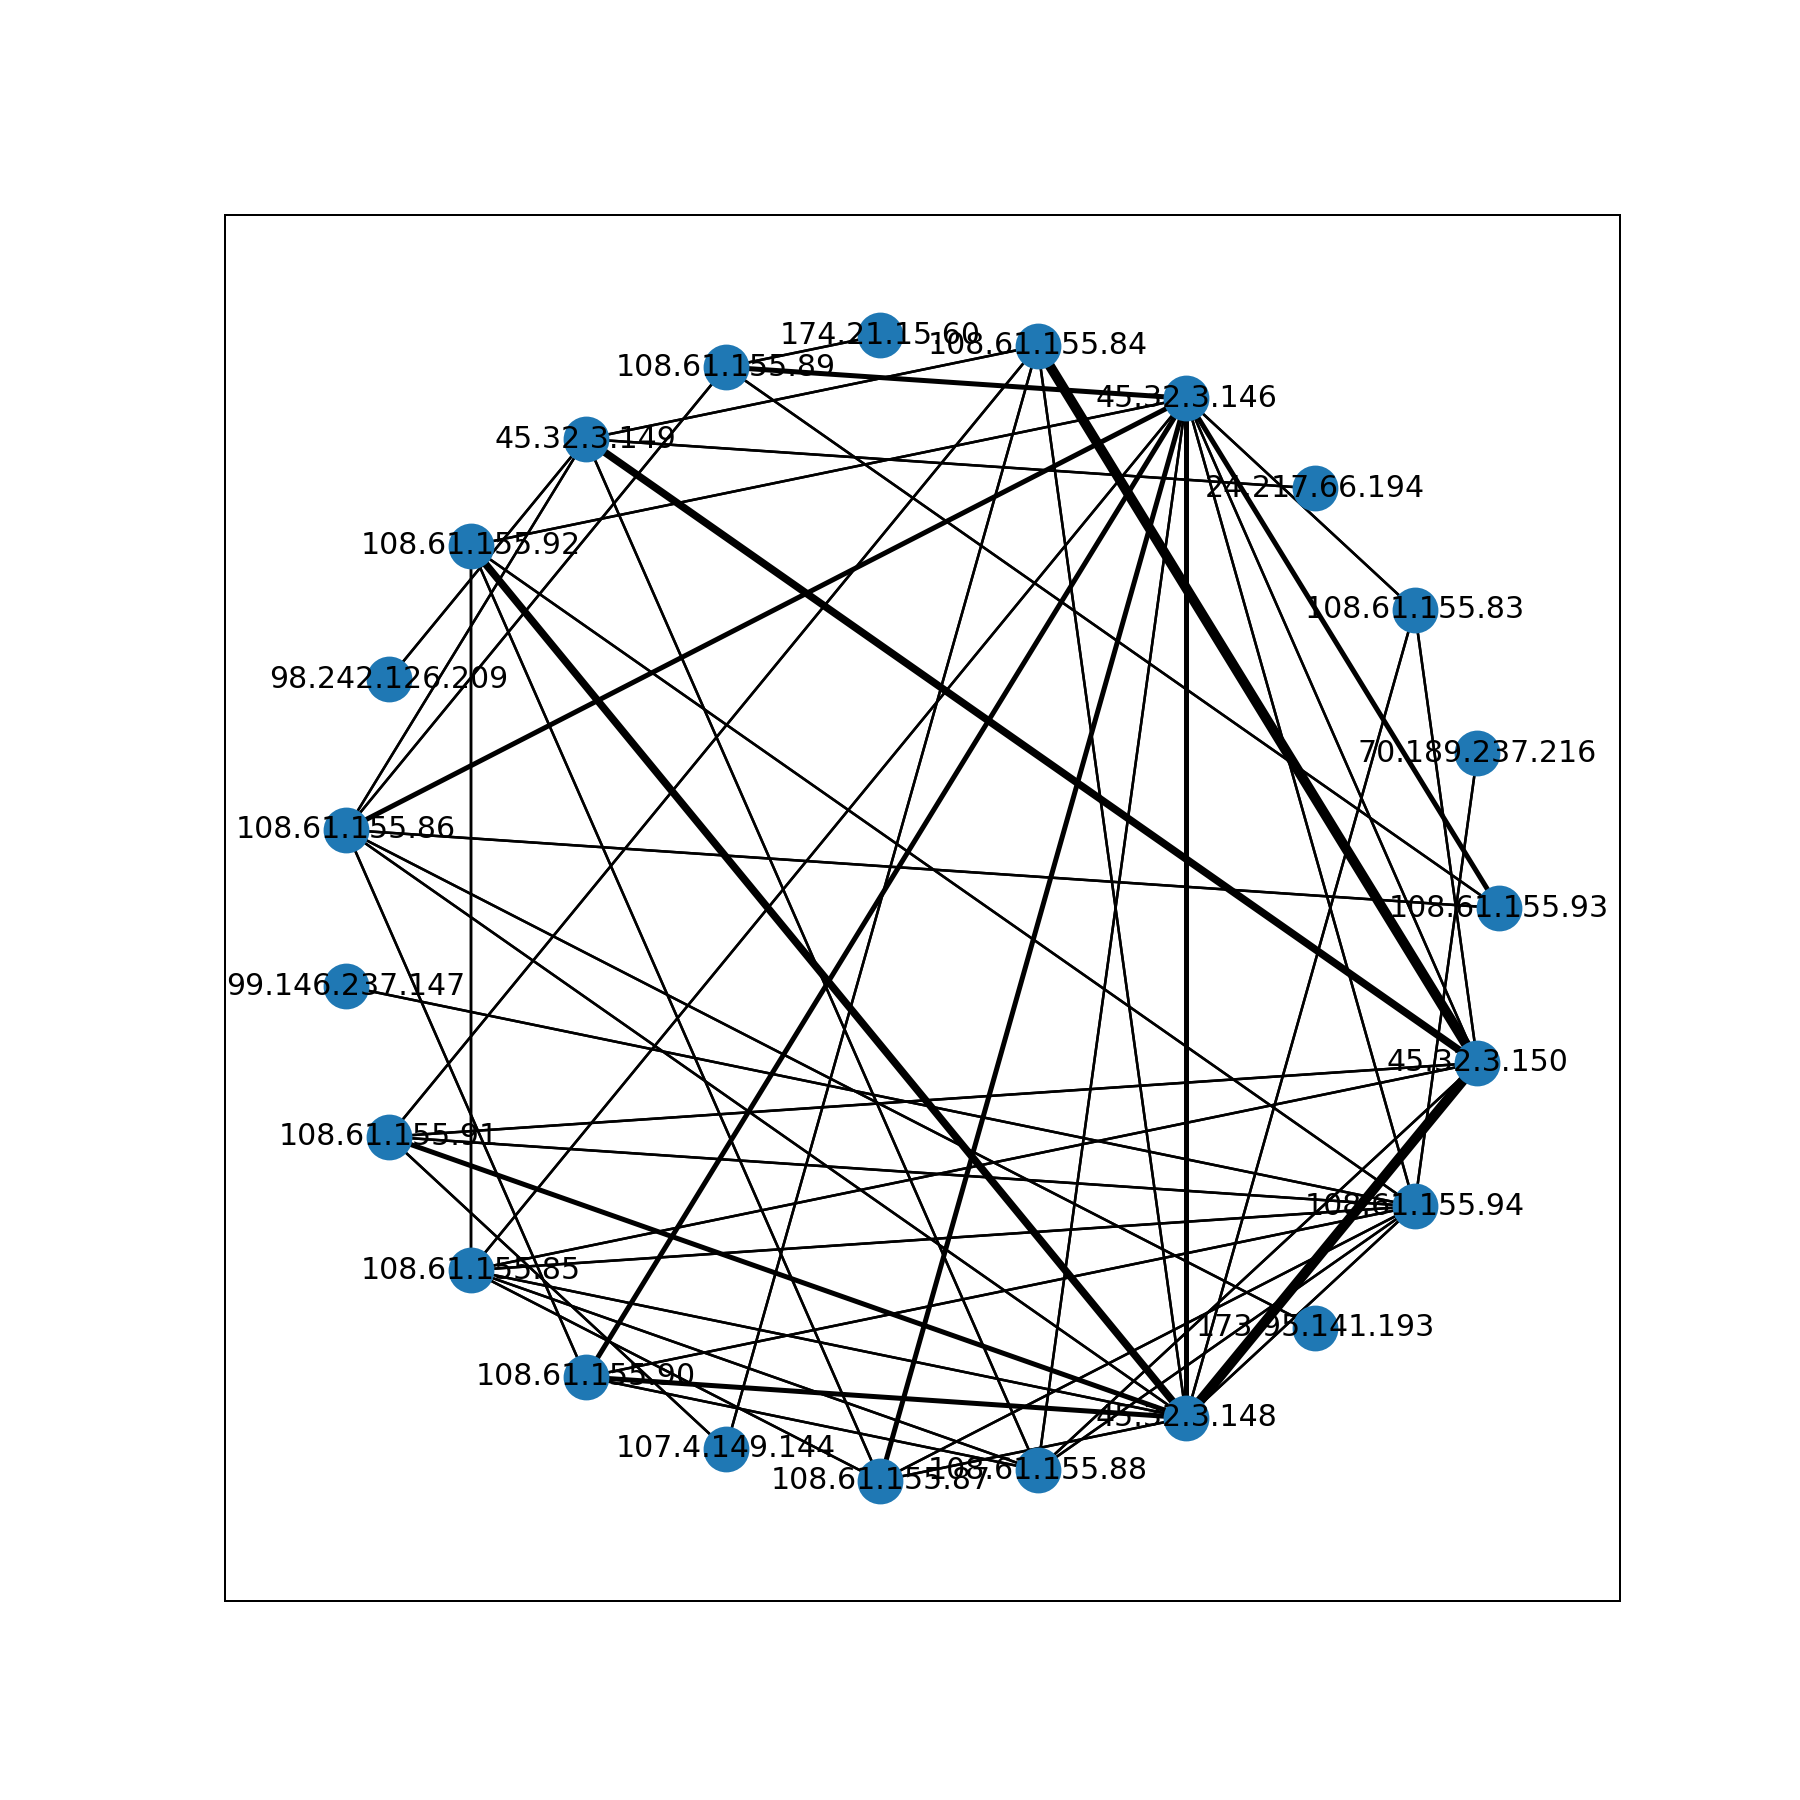

In [60]:
fig, ax = plt.subplots(1, figsize=(10,10))

pos1 = nx.circular_layout(G1)
nx.draw_networkx(G1, pos1)

for edge in G1.edges(data='weight'):
    nx.draw_networkx_edges(G1, pos1, edgelist=[edge], width=edge[2])

In [45]:
set(G1.nodes)

{'107.4.149.144',
 '108.61.155.83',
 '108.61.155.84',
 '108.61.155.85',
 '108.61.155.86',
 '108.61.155.87',
 '108.61.155.88',
 '108.61.155.89',
 '108.61.155.90',
 '108.61.155.91',
 '108.61.155.92',
 '108.61.155.93',
 '108.61.155.94',
 '173.95.141.193',
 '174.21.15.60',
 '24.217.66.194',
 '45.32.3.146',
 '45.32.3.148',
 '45.32.3.149',
 '45.32.3.150',
 '70.189.237.216',
 '98.242.126.209',
 '99.146.237.147'}

#### ip  -  device - Bipartite Graph

In [46]:
ip_dev_comps = list(B.subgraph(c) for c in nx.connected_components(B))
idx = [i for i in range(len(ip_dev_comps)) if '45.32.3.150' in ip_dev_comps[i]][0]

print(idx)

b = ip_dev_comps[idx].copy() # 
 
ips, devices = bipartite.sets(b, top_nodes=G1.nodes)

208


In [122]:
# Select a few IPs for better visualization
ips_selected = {'108.61.155.83', '108.61.155.84', '108.61.155.85',
                '108.61.155.86', '108.61.155.87', '108.61.155.88',
                '108.61.155.89', '108.61.155.90', '108.61.155.91',
                '108.61.155.92', '108.61.155.93', '108.61.155.94',
                '45.32.3.150',   '45.32.3.149',   '45.32.3.148'}

ips_to_be_remvd = ips - ips_selected

b.remove_nodes_from(ips_to_be_remvd)
b.remove_nodes_from(set(nx.isolates(b)))

In [47]:
mapping = {dev: f'dev {i}' for i, dev in enumerate(devices, start=1) if dev in b.nodes}

In [48]:
b = nx.relabel_nodes(b, mapping, copy=True)

<IPython.core.display.Javascript object>


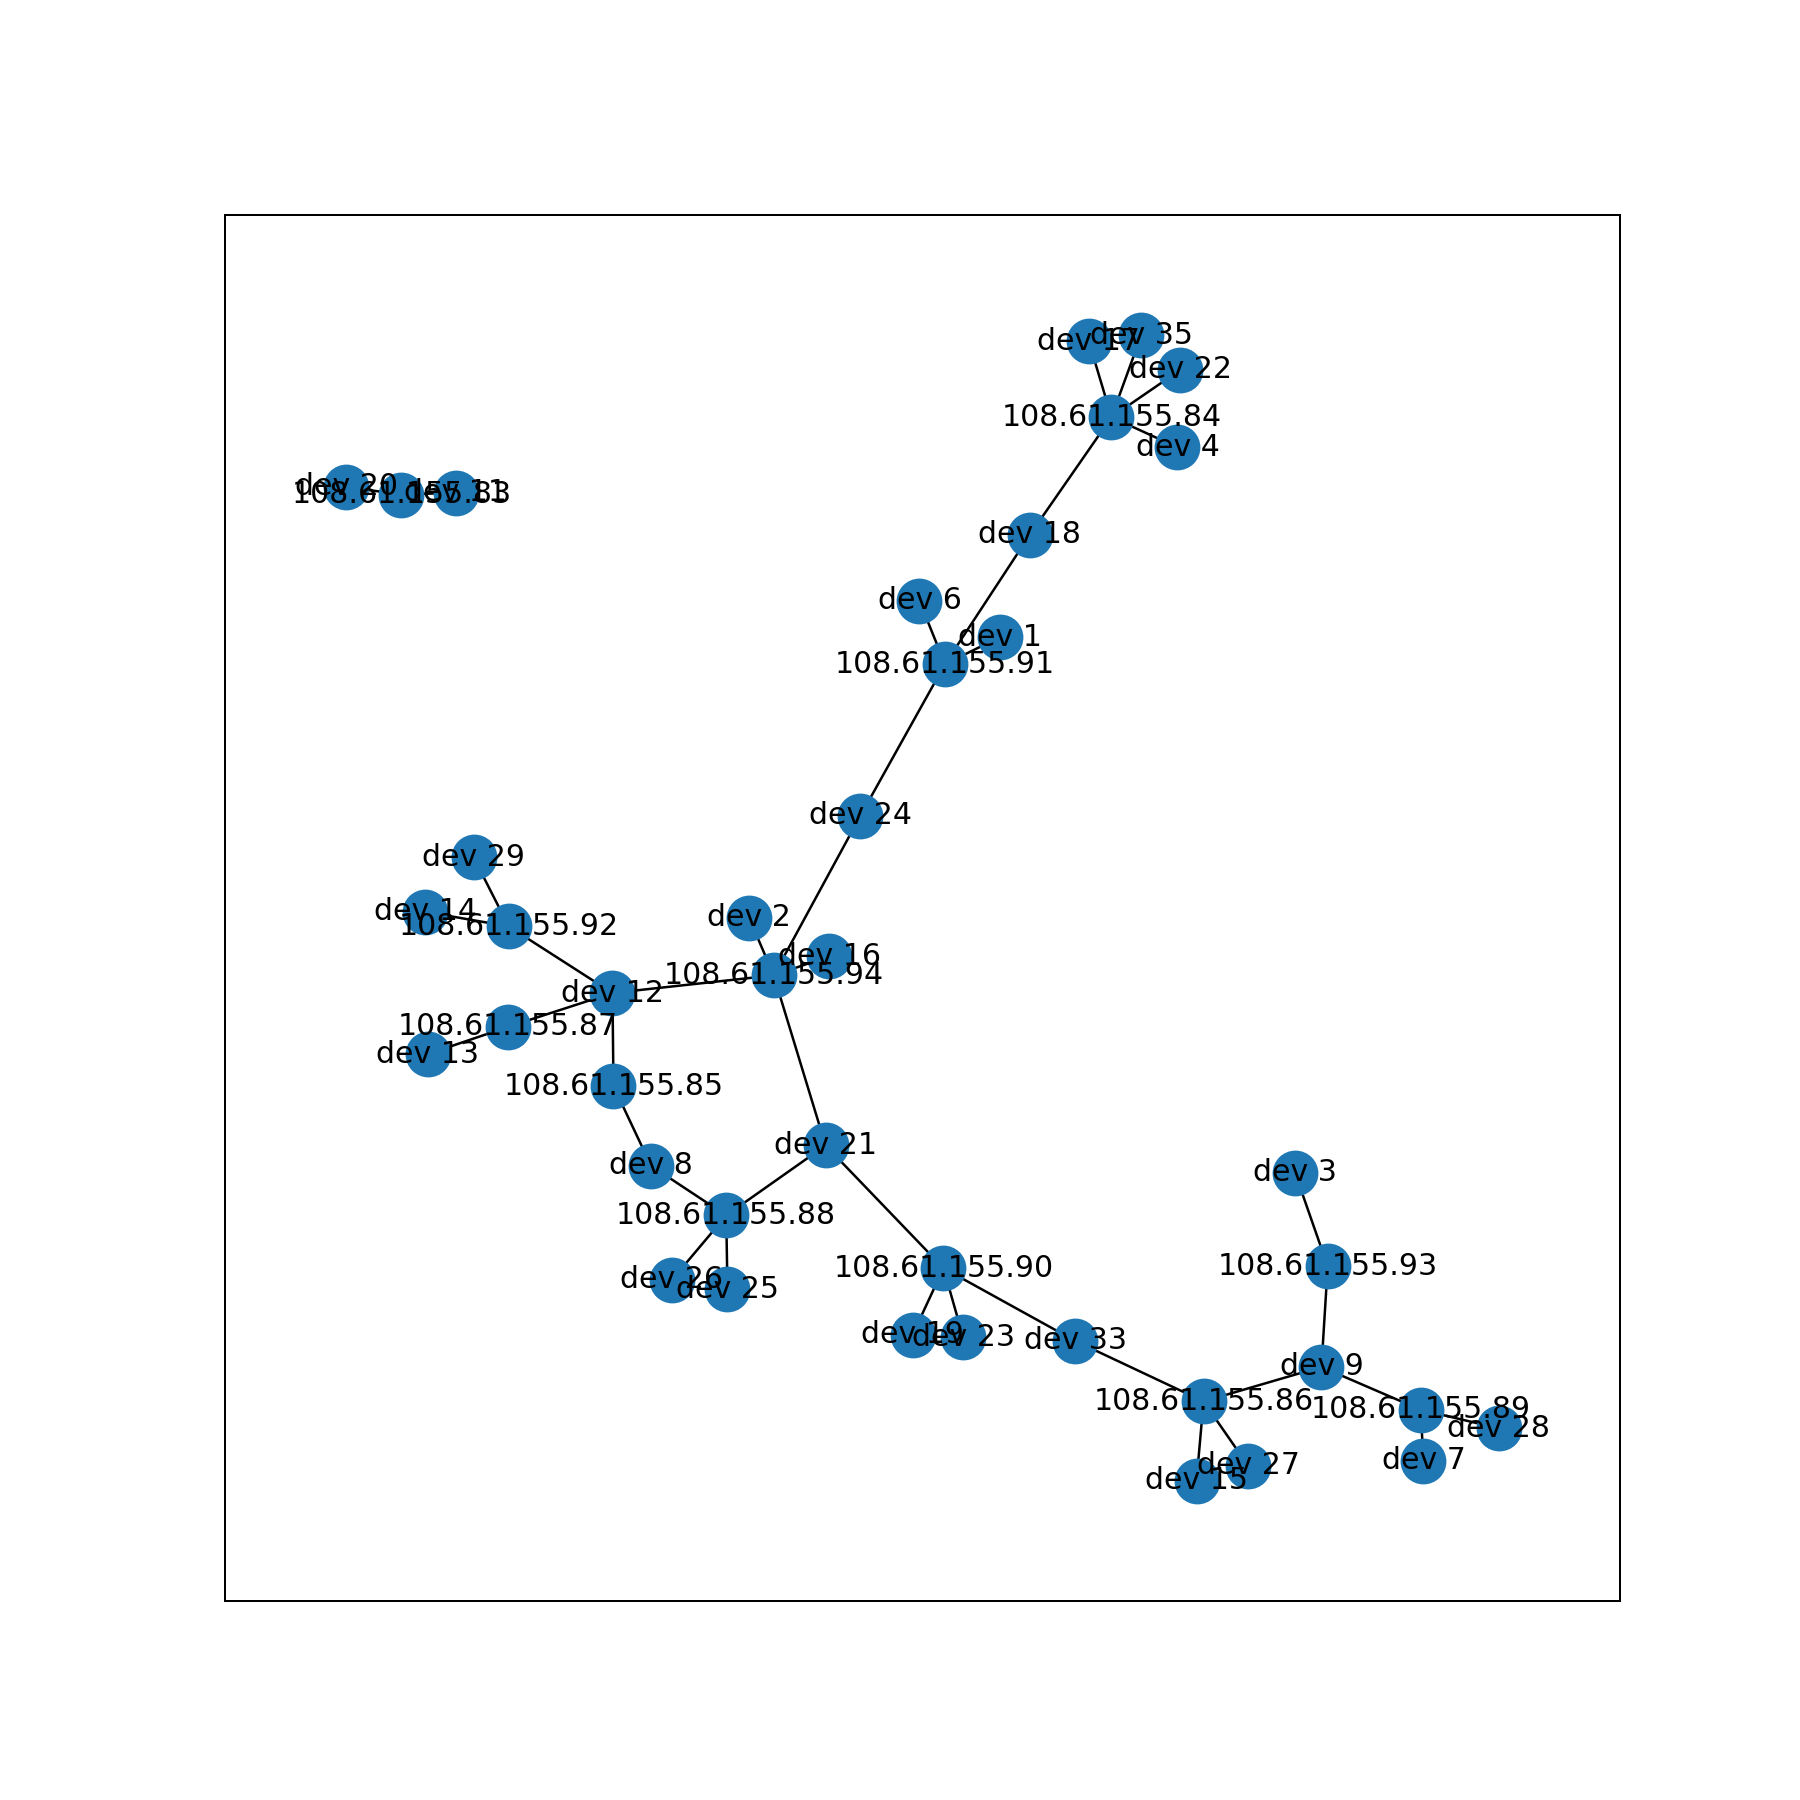

In [17]:
fig, ax = plt.subplots(1, figsize=(10,10))

pos1 = nx.fruchterman_reingold_layout(b, k=0.6, iterations=200)
nx.draw_networkx(b, pos1)

#### Plotly with networkX

In [ ]:
# for edge in b.edges():
#     print(edge)

for node in b.nodes():
    print(node, pos[node])

In [43]:
pos1

{'dev 1': array([-0.0588307 , -0.55745861]),
 'dev 2': array([-0.61854463,  0.56843179]),
 'dev 3': array([-0.27797861, -0.03018876]),
 'dev 4': array([-2.16019787e-04, -2.57279217e-01]),
 'dev 5': array([-0.45298251, -0.30254338]),
 '45.32.3.148': array([0.38933893, 0.1448845 ]),
 '174.21.15.60': array([-0.75602283, -0.30674005]),
 '108.61.155.94': array([-0.13988768, -0.20187277]),
 'dev 6': array([-0.06642347, -0.74841659]),
 '99.146.237.147': array([-0.68434322, -0.3927025 ]),
 '173.95.141.193': array([-0.03140333, -1.        ]),
 'dev 7': array([0.35687015, 0.33230971]),
 '108.61.155.91': array([0.03633607, 0.41882372]),
 'dev 8': array([-0.10775577,  0.52248526]),
 'dev 9': array([0.21139152, 0.64060156]),
 '45.32.3.146': array([ 0.18241178, -0.37555731]),
 'dev 10': array([ 0.27029995, -0.14838139]),
 'dev 11': array([-0.00307838, -0.59558926]),
 'dev 12': array([-0.09681102,  0.12471193]),
 '24.217.66.194': array([-0.79562772,  0.72107766]),
 '108.61.155.92': array([ 0.563025 ,

In [97]:
edge_x = []
edge_y = []

pos = nx.fruchterman_reingold_layout(b, k=0.4, iterations=200)

for edge in b.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
                    x=edge_x, y=edge_y,
                    line=dict(width=0.5, color='#888'),
                    hoverinfo='none',
                    mode='lines')

In [98]:
node_x = []
node_y = []
for node in b.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))


In [99]:
node_adjacencies = []
node_text = []
node_color = []
for node, adjacencies in b.adjacency():
    node_adjacencies.append(len(adjacencies))
    node_text.append(node)
    node_color.append('red'*node.startswith('dev') + 'blue'*(not node.startswith('dev')))

node_trace.marker.color = node_color
node_trace.text = node_text

In [101]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>IP - Device Graph',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
#                 annotations=[ dict(
#                     text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
#                     showarrow=False,
#                     xref="paper", yref="paper",
#                     x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()


#### d3graph with NetworkX

In [13]:
# Import library
from d3graph import d3graph
# Initialize
d3 = d3graph()
# Load example
# adjmat = d3.import_example('bigbang')


In [14]:
ip_dev_comps = list(B.subgraph(c) for c in nx.connected_components(B))
idx = [i for i in range(len(ip_dev_comps)) if '45.32.3.150' in ip_dev_comps[i]][0]

print(idx)

b = ip_dev_comps[idx].copy() # 
 
ips, devices = bipartite.sets(b, top_nodes=G1.nodes)

mapping = {dev: f'dev {i}' for i, dev in enumerate(devices, start=1) if dev in b.nodes}
b = nx.relabel_nodes(b, mapping, copy=True)

1008


In [134]:
# Select a few IPs for better visualization
ips_selected = {'108.61.155.83', '108.61.155.84', '108.61.155.85',
                '108.61.155.86', '108.61.155.87', '108.61.155.88',
                '108.61.155.89', '108.61.155.90', '108.61.155.91',
                '108.61.155.92', '108.61.155.93', '108.61.155.94',
                '45.32.3.150',   '45.32.3.149',   '45.32.3.148'}

ips_to_be_remvd = ips - ips_selected

b.remove_nodes_from(ips_to_be_remvd)
b.remove_nodes_from(set(nx.isolates(b)))

In [49]:
adjmat = pd.DataFrame(nx.to_pandas_adjacency(b))

In [50]:
adjmat

dev 1  dev 2  dev 3  107.4.149.144  dev 4  70.189.237.216  \
dev 1             0.0    0.0    0.0            0.0    0.0             0.0   
dev 2             0.0    0.0    0.0            0.0    0.0             0.0   
dev 3             0.0    0.0    0.0            0.0    0.0             0.0   
107.4.149.144     0.0    0.0    0.0            0.0    0.0             0.0   
dev 4             0.0    0.0    0.0            0.0    0.0             0.0   
70.189.237.216    0.0    0.0    0.0            0.0    0.0             0.0   
dev 5             0.0    0.0    0.0            0.0    0.0             0.0   
dev 6             0.0    0.0    0.0            0.0    0.0             0.0   
45.32.3.149       1.0    0.0    0.0            0.0    0.0             0.0   
108.61.155.86     0.0    0.0    0.0            0.0    0.0             0.0   
dev 7             0.0    0.0    0.0            1.0    0.0             0.0   
dev 8             0.0    0.0    0.0            0.0    0.0             0.0   
108.61.155.87     0.0    0.0    0.0            0.0    0.0             0.0   
98.242.126.209    0.0    0.0    0.0            0.0    0.0             0.0   
dev 9             0.0    0.0    0.0            0.0    0.0             0.0   
dev 10            0.0    0.0    0.0            0.0    0.0             0.0   
dev 11            0.0    0.0    0.0            0.0    0.0             0.0   
108.61.155.90     0.0    0.0    0.0            0.0    1.0             0.0   
173.95.141.193    0.0    0.0    0.0            0.0    0.0             0.0   
dev 12            0.0    0.0    0.0            0.0    0.0             0.0   
45.32.3.148       0.0    0.0    0.0            0.0    0.0             0.0   
dev 13            0.0    0.0    0.0            0.0    0.0             0.0   
108.61.155.84     0.0    0.0    0.0            0.0    0.0             0.0   
45.32.3.150       0.0    0.0    1.0            0.0    0.0             0.0   
45.32.3.146       0.0    0.0    1.0            0.0    0.0             0.0   
dev 14            0.0    0.0    0.0            0.0    0.0             0.0   
dev 15            0.0    0.0    0.0            0.0    0.0             0.0   
24.217.66.194     1.0    0.0    0.0            0.0    0.0             0.0   
108.61.155.94     0.0    0.0    0.0            0.0    1.0             0.0   
dev 16            0.0    0.0    0.0            0.0    0.0             0.0   
108.61.155.92     0.0    0.0    0.0            0.0    0.0             0.0   
dev 17            0.0    0.0    0.0            0.0    0.0             0.0   
108.61.155.85     0.0    0.0    0.0            0.0    0.0             0.0   
174.21.15.60      0.0    1.0    0.0            0.0    0.0             0.0   
108.61.155.89     0.0    1.0    0.0            0.0    0.0             0.0   
dev 18            0.0    0.0    0.0            0.0    0.0             0.0   
108.61.155.88     0.0    0.0    0.0            0.0    1.0             0.0   
dev 19            0.0    0.0    0.0            0.0    0.0             0.0   
dev 20            0.0    0.0    0.0            0.0    0.0             0.0   
dev 21            0.0    0.0    0.0            0.0    0.0             0.0   
dev 22            0.0    0.0    0.0            0.0    0.0             0.0   
dev 23            0.0    0.0    0.0            0.0    0.0             0.0   
dev 24            0.0    0.0    0.0            0.0    0.0             0.0   
dev 25            0.0    0.0    0.0            0.0    0.0             0.0   
dev 26            0.0    0.0    0.0            0.0    0.0             0.0   
dev 27            0.0    0.0    0.0            0.0    0.0             0.0   
108.61.155.83     0.0    0.0    1.0            0.0    0.0             0.0   
dev 28            0.0    0.0    0.0            0.0    0.0             0.0   
dev 29            0.0    0.0    0.0            0.0    0.0             0.0   
dev 30            0.0    0.0    0.0            0.0    0.0             0.0   
108.61.155.91     0.0    0.0    0.0            0.0    0.0             0.0   
99.146.237.1

In [20]:
# d3graph
from d3graph import d3graph

adjmat = pd.DataFrame(nx.to_pandas_adjacency(b))
# Initialize
d3 = d3graph(charge=1000, collision=0.3)
# Process adjmat
d3.graph(adjmat)

# Set color and size
color = ['#f25c5f' if s.startswith('dev') else '#1152d4' for s in adjmat.columns]
size = [6 if s.startswith('dev') else 10 for s in adjmat.columns]

d3.set_node_properties(color=color, size=size)

d3.show(filepath='/Users/aishik/Documents/Study/Programming/Graphs/Applied Social Network Analysis/full_net.html')

[d3graph] INFO> Keep only edges with weight>0
[d3graph] INFO> Slider range is set to [0, 1]
[d3graph] INFO> Write to path: [/Users/aishik/Documents/Study/Programming/Graphs/Applied Social Network Analysis/full_net.html]
[d3graph] INFO> File already exists and will be overwritten: [/Users/aishik/Documents/Study/Programming/Graphs/Applied Social Network Analysis/full_net.html]


### 47 Samurai : Edge Weights -> `n_reqs`

In [2]:
df = pd.read_csv('47_Samurai_ip_devId_.csv')
df = df[~df.dev_id.isin({'au-fetch-stb-0001', '00000000-0000-0000-0000-000000000000', 'REPLACE_ME', 'NULL'}) &\
           (~df.dev_id.isna())]
df = df[['ip', 'dev_id', 'n_reqs']]

In [3]:
df['n_reqs'] = np.where(df['n_reqs'] == 0, 1, df['n_reqs'])

In [4]:
# Create the Bipartite Graph
B = nx.Graph()
B.add_nodes_from(set(df.ip), bipartite=0)
B.add_nodes_from(set(df.dev_id), bipartite=1)

# Add edges between IP and Devices 
B.add_weighted_edges_from(list(df.itertuples(index=False, name=None)))

print(bipartite.is_bipartite(B)) # Check if BipartiteX = set(df.ip.unique())  # IPs are one set of bipartite nodes

True


In [5]:
X = set(df.ip.unique())            # IPs are one set of bipartite nodes
P = bipartite.weighted_projected_graph(B, X)  # Weighted Projected Graphs

In [6]:
comps = list(P.subgraph(c) for c in nx.connected_components(P))

In [57]:
comp_nodes = np.array(list(map(lambda x: len(x), comps)))
comp_nodes[comp_nodes>15]

array([ 58, 157,  31,  49,  88,  69,  26,  82,  18,  28,  54,  24,  24,
        25, 146,  50,  32,  22,  36, 146,  22,  23,  22,  29,  45,  20,
        30,  43,  26,  22,  55])

In [89]:
[i for i, G in enumerate(comps) if len(G) == 32]

[276]

In [90]:
[i for i in range(len(comps)) if '45.32.3.150' in comps[i]]

[363]

### IP - Device Graph

#### Graph Containing IP 45.32.3.150

In [94]:
ip_dev_comps = list(B.subgraph(c) for c in nx.connected_components(B))
# idx = [i for i in range(len(ip_dev_comps)) if '45.32.3.150' in ip_dev_comps[i]][0]
idx = 45
print(idx)

b = ip_dev_comps[idx].copy() # 
G1 = comps[idx].copy()
ips, devices = bipartite.sets(b, top_nodes=G1.nodes)


mapping = {dev: f'dev {i}' for i, dev in enumerate(devices, start=1) if dev in b.nodes}
b = nx.relabel_nodes(b, mapping, copy=True)

45


In [95]:
mapping = {dev: f'dev {i}' for i, dev in enumerate(devices, start=1) if dev in b.nodes}
b = nx.relabel_nodes(b, mapping, copy=True)

In [96]:
# plotly Graph 
edge_x = []
edge_y = []

pos = nx.fruchterman_reingold_layout(b, k=0.25, iterations=200)

for edge in b.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
                        x=edge_x, y=edge_y,
                        line=dict(width=0.5, color='#888'),
                        hoverinfo='none',
                        mode='lines')


node_x = []
node_y = []
for node in b.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
#         colorbar=dict(
#             thickness=15,
#             title='Node Connections',
#             xanchor='left',
#             titleside='right'
#         ),
        line_width=2)
)

node_adjacencies = []
node_text = []
node_color = []
for node, adjacencies in b.adjacency():
    node_adjacencies.append(len(adjacencies))
    node_text.append(node)
    node_color.append('red'*node.startswith('dev') + 'blue'*(not node.startswith('dev')))

node_trace.marker.color = node_color
node_trace.text = node_text



fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                height=500, width=700,
                title='<br>IP - Device Graph',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                plot_bgcolor = 'rgb(250, 250, 250)',
                paper_bgcolor = 'rgb(250, 250, 250)',),
                )
fig.show()


__IP - IP Graph__

In [97]:
p = bipartite.weighted_projected_graph(b, ips)  # Weighted Projected Graphs

In [98]:
ex_ip = '172.58.196.123'
conn_ips = set(p.neighbors(ex_ip))
conn_ips.add(ex_ip)

In [99]:
node_adjacencies = []
node_text = []
node_color = []
for node, adjacencies in p.adjacency():
    if node in conn_ips:
        node_adjacencies.append(len(adjacencies))
        node_text.append(node)
        node_color.append('blue')

In [105]:
# plotly Graph 
edge_x = []
edge_y = []

pos = nx.fruchterman_reingold_layout(p, k=0.1, iterations=80)

for edge in p.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
                        x=edge_x, y=edge_y,
                        line=dict(width=0.9, color='#888'),
                        hoverinfo='none',
                        mode='lines')


node_x = []
node_y = []
for node in p.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
#         colorbar=dict(
#             thickness=15,
#             title='Node Connections',
#             xanchor='left',
#             titleside='right'
#         ),
        line_width=2)
)

node_adjacencies = []
node_text = []
node_color = []
for node, adjacencies in p.adjacency():
    node_adjacencies.append(len(adjacencies))
    node_text.append(node + '<br><br><b>Degree</b>: '+ str(len(adjacencies)) +\
                     '<br><b>Max Weight</b>: 1<br><b>Size</b>: 26')
    node_color.append('blue')

node_trace.marker.color = node_color
node_trace.text = node_text



fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                height=500, width=700,
                title=f'<br>Graph of connected IPs: Size={len(p)}',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                plot_bgcolor = 'rgb(250, 250, 250)',
                paper_bgcolor = 'rgb(250, 250, 250)',),
                )
fig.show()

In [ ]:
# d3graph
from d3graph import d3graph

adjmat = pd.DataFrame(nx.to_pandas_adjacency(b))
np.sqrt(adjmat)
# Initialize
d3 = d3graph(charge=1000, collision=0.3)
# Process adjmat
d3.graph(adjmat)

# Set color and size
color = ['#f25c5f' if s.startswith('dev') else '#1152d4' for s in adjmat.columns]
size = [6 if s.startswith('dev') else 10 for s in adjmat.columns]

d3.set_node_properties(color=color, size=size)

d3.show(filepath='/Users/aishik/Documents/Study/Programming/Graphs/Applied Social Network Analysis/full_net.html')

#### Graph Containing IP 154.16.180.49	

In [115]:
ip_dev_comps = list(B.subgraph(c) for c in nx.connected_components(B))
idx = [i for i in range(len(ip_dev_comps)) if '99.191.122.223' in ip_dev_comps[i]][0]

print(idx)

b = ip_dev_comps[idx].copy() #  
G2 = comps[idx]
ips, devices = bipartite.sets(b, top_nodes=G2.nodes)

mapping = {dev: f'dev {i}' for i, dev in enumerate(devices, start=1) if dev in b.nodes}
b = nx.relabel_nodes(b, mapping, copy=True)

IndexError: list index out of range

In [101]:
# d3graph
from d3graph import d3graph

adjmat = pd.DataFrame(nx.to_pandas_adjacency(b))
np.sqrt(adjmat)
# Initialize
d3 = d3graph(charge=1000, collision=0.3)
# Process adjmat
d3.graph(adjmat)

# Set color and size
color = ['#f25c5f' if s.startswith('dev') else '#1152d4' for s in adjmat.columns]
size = [6 if s.startswith('dev') else 10 for s in adjmat.columns]

d3.set_node_properties(color=color, size=size)

d3.show(filepath='/Users/aishik/Documents/Study/Programming/Graphs/Applied Social Network Analysis/full_net_250.html')

[d3graph] INFO> Keep only edges with weight>0
[d3graph] INFO> Slider range is set to [4, 182]
[d3graph] INFO> Write to path: [/Users/aishik/Documents/Study/Programming/Graphs/Applied Social Network Analysis/full_net_250.html]
[d3graph] INFO> File already exists and will be overwritten: [/Users/aishik/Documents/Study/Programming/Graphs/Applied Social Network Analysis/full_net_250.html]


#### Graph Containing IP 

In [ ]:
ip_dev_comps = list(B.subgraph(c) for c in nx.connected_components(B))
idx = [i for i, G in enumerate(comps) if len(G) == 88][0]

print(idx)

b = ip_dev_comps[idx].copy() #  
G2 = comps[idx]
ips, devices = bipartite.sets(b, top_nodes=G2.nodes)

mapping = {dev: f'dev {i}' for i, dev in enumerate(devices, start=1) if dev in b.nodes}
b = nx.relabel_nodes(b, mapping, copy=True)

In [154]:
# d3graph
from d3graph import d3graph

adjmat = pd.DataFrame(nx.to_pandas_adjacency(b))
np.sqrt(adjmat)
# Initialize
d3 = d3graph(charge=1000, collision=0.3)
# Process adjmat
d3.graph(adjmat)

# Set color and size
color = ['#f25c5f' if s.startswith('dev') else '#1152d4' for s in adjmat.columns]
size = [6 if s.startswith('dev') else 10 for s in adjmat.columns]

d3.set_node_properties(color=color, size=size)

d3.show(filepath='/Users/aishik/Documents/Study/Programming/Graphs/Applied Social Network Analysis/full_net_54.html')

[d3graph] INFO> Keep only edges with weight>0
[d3graph] INFO> Slider range is set to [3, 181]
[d3graph] INFO> Write to path: [/Users/aishik/Documents/Study/Programming/Graphs/Applied Social Network Analysis/full_net_54.html]
[d3graph] INFO> File already exists and will be overwritten: [/Users/aishik/Documents/Study/Programming/Graphs/Applied Social Network Analysis/full_net_54.html]


### SpotX AE

In [3]:
# df = pd.read_csv('SpotX_AE_ip_devId.csv')
df = pd.read_csv('58474_ip_dev.csv')
df = df[~df.dev_id.isin({'au-fetch-stb-0001', '00000000-0000-0000-0000-000000000000', 'REPLACE_ME', 'NULL'}) &\
        (df.n_reqs > 0)]
df = df[['ip', 'dev_id']]

In [77]:
# Create the Bipartite Graph
B = nx.Graph()
B.add_nodes_from(set(df.ip), bipartite=0)
B.add_nodes_from(set(df.dev_id), bipartite=1)

# Add edges between IP and Devices 
B.add_edges_from(list(df.itertuples(index=False, name=None)))

bipartite.is_bipartite(B) # Check if Bipartite

True

In [8]:
df[df.dev_id.str.contains('_|\\{|\\}|\\[|\\]')]

Empty DataFrame
Columns: [ip, dev_id]
Index: []

In [78]:
X = set(df.ip.unique())            # IPs are one set of bipartite nodes
P = bipartite.weighted_projected_graph(B, X)  # Weighted Projected Graphs

In [79]:
comps = [P.subgraph(c) for c in nx.connected_components(P) if len(c) > 1]

In [29]:
comp_nodes = np.array([len(c) for c in comps])
comp_nodes[comp_nodes > 15] 

array([ 51,  25,  17,  28,  27,  32,  65,  22, 602,  88,  23,  57, 156,
       311, 140,  17, 143, 205,  94, 102,  38,  99, 113,  33, 109,  19,
        36,  18,  24,  40, 113,  64,  52,  16,  16,  17,  27,  22,  18,
        28,  17])

In [30]:
len(comp_nodes[comp_nodes > 1])

22211

#### IP Device Graph

In [80]:
# df = pd.read_csv('SpotX_AE_ip_devId.csv')
df = pd.read_csv('58474_ip_dev.csv')
df = df[~df.dev_id.isin({'au-fetch-stb-0001', '00000000-0000-0000-0000-000000000000', 'REPLACE_ME', 'NULL'}) &\
        (df.n_reqs > 0)]
df = df[['ip', 'dev_id', 'n_reqs']]

In [81]:
# Create the Bipartite Graph
B = nx.Graph()
B.add_nodes_from(set(df.ip), bipartite=0)
B.add_nodes_from(set(df.dev_id), bipartite=1)

# Add edges between IP and Devices 
B.add_weighted_edges_from(list(df.itertuples(index=False, name=None)))

print(bipartite.is_bipartite(B)) # Check if BipartiteX = set(df.ip.unique())  # IPs are one set of bipartite nodes

True


In [82]:
# fraud IPs
fraud_gdf = fraud_ips.merge(df, on=['ip'])

# IPs that form a graph
ls = set()

for _ in comps:
    ls.update(set(_.nodes))
    
    
fraud_gdf = fraud_gdf[fraud_gdf.ip.isin(ls)]
fraud_gdf

ip                                    dev_id  n_reqs
2      44.200.112.181  fc78d839c0a41552de8179e4128429c0c8403b74       1
4      172.58.221.154      92de6bf7-d484-45a4-8155-d6969dad8deb       5
5        134.6.93.249      67a6bc4f-d376-3bca-87bf-b5ba19741f82       3
6     166.205.124.118      ef019e3d-248b-478d-a50f-6420097ca5a7       2
7     166.205.124.118      04dfcbf9-d272-3be3-b36f-014f4956c717       4
...               ...                                       ...     ...
5071    18.206.59.129  e19d3a0d5ff8d2212e24b0e05dd716765098c6a3       1
5072    3.229.138.169      3c75f7a2-e094-514b-9003-14efe148bf47       1
5075   107.77.203.169      39a8c50c-1c00-59b9-9618-0c0c7049d66f       1
5077  184.170.240.202      e8f025f7-f672-40e9-82c3-436f798aa977       3
5084      76.14.222.0      a6bc6348-93d8-5451-a543-d20825f12c57       1

[1951 rows x 3 columns]

In [86]:
ip_dev_comps = list(B.subgraph(c) for c in nx.connected_components(B))
idx = [i for i, G in enumerate(comps) if fraud_gdf.ip[2] in G][0]

print(idx)

b = ip_dev_comps[idx].copy() #  
# G2 = comps[idx]
# ips, devices = bipartite.sets(b, top_nodes=G2.nodes)

# mapping = {dev: f'dev {i}' for i, dev in enumerate(devices, start=1) if dev in b.nodes}
# b = nx.relabel_nodes(b, mapping, copy=True)

1411


In [87]:
b.nodes

NodeView(('4da322f0-934a-b7c9-2bfb-0273ece64736', '69.58.130.0'))

In [70]:
fraud_ips_in_G2 = set(fraud_ips[fraud_ips.ip.isin(G2.nodes)].ip)

In [84]:
len(G2)

113

In [61]:
d = dict(b.degree)
max(d, key=d.get)

'dev 1'

In [ ]:
del mapping, G2, ip_dev_comps

In [72]:
# d3graph
from d3graph import d3graph

adjmat = pd.DataFrame(nx.to_pandas_adjacency(b))
np.sqrt(adjmat)
# Initialize
d3 = d3graph(charge=700, collision=0.3)
# Process adjmat
d3.graph(adjmat)

# Set color and size
color = ['#f25c5f' if s.startswith('dev') else '#1152d4' for s in adjmat.columns]
size = [6 if s.startswith('dev') else 10 for s in adjmat.columns]

d3.set_node_properties(color=color, size=size)

d3.show(filepath='/Users/aishik/Documents/Study/Programming/Graphs/Applied Social Network Analysis/htmls/SpotX_1.html')


[d3graph] INFO> Keep only edges with weight>0
[d3graph] INFO> Slider range is set to [0, 1]
[d3graph] INFO> Write to path: [/Users/aishik/Documents/Study/Programming/Graphs/Applied Social Network Analysis/htmls/SpotX_1.html]
[d3graph] INFO> File already exists and will be overwritten: [/Users/aishik/Documents/Study/Programming/Graphs/Applied Social Network Analysis/htmls/SpotX_1.html]


## Normal IPs connected to fraud IPs

In [55]:
df = pd.read_csv('60993_ip_dev.csv')
df = df[~df.dev_id.isin({'au-fetch-stb-0001', '00000000-0000-0000-0000-000000000000', 'REPLACE_ME', 'NULL'}) &\
           (~df.dev_id.isna())]
df = df[['ip', 'dev_id', 'n_reqs']]

df['n_reqs'] = np.where(df['n_reqs'] == 0, 1, df['n_reqs'])

In [66]:
df = \
df[(df.ip.isin(ips)) & 
   (df.ip.str.startswith(('172.58.146', '74.133', '172.58.147')))] 

In [67]:
# Create the Bipartite Graph
B = nx.Graph()
B.add_nodes_from(set(df.ip), bipartite=0)
B.add_nodes_from(set(df.dev_id), bipartite=1)

# Add edges between IP and Devices 
B.add_weighted_edges_from(list(df.itertuples(index=False, name=None)))

print(bipartite.is_bipartite(B)) # Check if BipartiteX = set(df.ip.unique())  # IPs are one set of bipartite nodes

True


In [72]:
X = set(df.ip.unique())            # IPs are one set of bipartite nodes
P = bipartite.weighted_projected_graph(B, X)  # Weighted Projected Graphs

comps = list(P.subgraph(c) for c in nx.connected_components(P))

In [78]:
# fraud IPs
fraud_gdf = fraud_ips.merge(df, on=['ip'])

# IPs that form a graph
ls = set()

for _ in comps:
    ls.update(set(_.nodes))
    
    
fraud_gdf = fraud_gdf[fraud_gdf.ip.isin(ls)]
fraud_gdf

ip                                dev_id  n_reqs
0    172.58.147.201  ecf8be97-e741-55b1-8f50-88af87dba5c0       1
1    172.58.147.201  44256661-ffba-4ced-bf97-1ed0fd391aea       1
2    172.58.146.121  62e7e1c4-fc9e-57a6-8317-7c4b0c1a9173       1
3    172.58.146.121  b496d422-7f00-0a12-d74f-c4280ace82a8       1
4     172.58.147.77  f4d2c29f-aab2-51ba-9344-a9a447c61409       1
..              ...                                   ...     ...
405   172.58.146.63  27e53ac0-7d22-571e-a8df-49fd57623762       1
406   172.58.146.63  c3d071ee-7db4-4eee-92ed-a828a58a5515       1
407  172.58.146.173  1e87ffcb-0192-0df7-5625-8894e78c2c66       1
408  172.58.146.173  afcd178f-564a-0f75-0bca-1ea1db7f8d5f       1
409  172.58.146.173  3f0e3a57-53df-4687-8e73-6b1139d9d5f3       1

[410 rows x 3 columns]

In [73]:
ip_dev_comps = list(B.subgraph(c) for c in nx.connected_components(B))
idx = [i for i, G in enumerate(comps) if '172.58.146.173' in G][0]
# 172.58.147.123
# idx = 205
print(idx)

b = ip_dev_comps[idx].copy() #  
G2 = comps[idx]
ips, devices = bipartite.sets(b, top_nodes=G2.nodes)

mapping = {dev: f'dev {i}' for i, dev in enumerate(devices, start=1) if dev in b.nodes}
b = nx.relabel_nodes(b, mapping, copy=True)

0


In [74]:
len(b)

469

In [75]:
len(ips)

142

In [65]:
df[(df.ip.isin(ips)) & (df.ip.str.startswith(('172.58.146', '74.133', '172.58.147')))].to_csv(f'filmzie_1.csv', index=False)

In [64]:
df[(df.ip.isin(ips)) & (df.ip.str.startswith(('172.58.146', '74.133', '172.58.147')))].ip.nunique()
    #.to_csv(f'spotx_1.csv')

142

In [76]:
def set_color(s):
    #cc66ff
    if s.startswith('dev'):
        return '#f25c5f'
    if s in set(fraud_gdf.ip):
        return '#cc66ff'
    else:
        return '#1152d4'

In [3]:
# d3graph
from d3graph import d3graph

adjmat = pd.DataFrame(nx.to_pandas_adjacency(b))
np.sqrt(adjmat)
# Initialize
d3 = d3graph(charge=500, collision=0.3)
# Process adjmat
d3.graph(adjmat)

# Set color and size
color = ['#f25c5f' if s.startswith('dev') else '#1152d4' for s in adjmat.columns]
color = [set_color(s) for s in adjmat.columns]
size = [6 if s.startswith('dev') else 10 for s in adjmat.columns]

d3.set_node_properties(color=color, size=size)

d3.show(filepath='/Users/aishik/Documents/Study/Programming/Graphs/Applied Social Network Analysis/htmls/Filmzie_1.html')


Exception: [d3graph] >Error: jinja2 versions > 2.11.3 gives an error! It is advised to create a new environment install d3graph or: pip install -U jinja2==2.11.3

In [105]:
len(set.intersection(set(b.nodes), set(fraud_gdf.ip)))

97

In [106]:
len(G2)

97

In [136]:
# IPs connected to fraud IPs
collect = []
fraud_gdf_ips = pd.DataFrame(fraud_gdf.ip.unique(), columns=['ip'])
for i, c in tqdm(enumerate(comps)):
    l = len(c)
    if l > 1:
        common = len(fraud_gdf_ips[fraud_gdf_ips.ip.isin(c)])
        if (common <=2) & ((common >0)) & ((l - common)>10): print(i)
        
        collect.append((common, l - common))
        
ips_conn_to_fraud = pd.DataFrame(collect, columns=['fraud', 'normal'])

146it [00:00, 549.24it/s]

73
79
205


375it [00:00, 697.55it/s]

249
284
294


621it [00:00, 757.80it/s]

491


1023it [00:01, 734.35it/s]

937
950


1252it [00:01, 609.54it/s]

1115


1442it [00:02, 584.23it/s]

1318


1761it [00:02, 624.84it/s]

1622
1632
1653


2158it [00:03, 780.52it/s]

2055
2147
2206
2232


2379it [00:03, 676.52it/s]


KeyboardInterrupt: 

In [141]:
len(comps[205])

39

In [108]:
_ = ips_conn_to_fraud[ips_conn_to_fraud.fraud > 0]
_.normal.sum(), _.fraud.sum()

(12472, 4251)

In [ ]:
1.2 B -> DV -> 100K ->

1.2 B -> DS block -> 500M -> DV -> 

500M + 100K IPs



In [ ]:
1.2B -> DS block -> 500M -> DV -> 100K

In [ ]:


16th Jun -> 100K
18th Jun -> 

11th - 17th


In [49]:
# % fraud IPs plot for different variables
fig = go.Figure()

hovertext1 = \
        a.apply(lambda row: f"<b>n_IPs:</b> {row['n_ips_0']+row['n_ips_1']}<br><b>n_fraud_IPs</b>: {row['n_ips_1']}<br><b>% fraud IPs</b>: {row['perc_fraud']:.3f}", 
                axis=1)
hovertext2 = \
        b.apply(lambda row: f"<b>n_IPs:</b> {row['n_ips_0']+row['n_ips_1']}<br><b>n_fraud_IPs</b>: {row['n_ips_1']}<br><b>% fraud IPs</b>: {row['perc_fraud']:.3f}", 
                axis=1)
hovertext3 = \
        c.apply(lambda row: f"<b>n_IPs:</b> {row['n_ips_0']+row['n_ips_1']}<br><b>n_fraud_IPs</b>: {row['n_ips_1']}<br><b>% fraud IPs</b>: {row['perc_fraud']:.3f}", 
                axis=1)
hovertext4 = \
        d.apply(lambda row: f"<b>n_IPs:</b> {row['n_ips_0']+row['n_ips_1']}<br><b>n_fraud_IPs</b>: {row['n_ips_1']}<br><b>% fraud IPs</b>: {row['perc_fraud']:.3f}", 
                axis=1)


fig.add_trace(go.Bar(x=a.SUPPLY_PARTNER_NAME, y=a.perc_fraud, name='Partner', 
                     hovertext=hovertext1, hoverinfo='text', opacity=opacity))

fig.add_trace(go.Bar(x=b.APP_BUNDLE, y=b.perc_fraud, name='APP_BUNDLE', hoverinfo='text',
                     hovertext=hovertext2, opacity=opacity, visible=False))

fig.add_trace(go.Bar(x=c.BRAND_NAME, y=c.perc_fraud, name='BRAND_NAME', hoverinfo='text',
                     hovertext=hovertext3, opacity=opacity, visible=False))

fig.add_trace(go.Bar(x=d.US, y=d.perc_fraud, name='COUNTRY', hoverinfo='text',
                     hovertext=hovertext4, opacity=opacity, visible=False))


fig.update_layout( 
                  xaxis=dict(
                      showline=True,
                      showgrid=False,
                      showticklabels=True,
                      linecolor='rgb(190, 190, 190)',
                      linewidth=2.5, 
                      ticks='',
                      tickfont=dict(
                                    family='Arial',
                                    size=15,
                                    color='rgb(82, 82, 82)',
                                    )),
                  yaxis=dict(
                             showline=True,
                             showgrid=False,
                             showticklabels=True,
                             linecolor='rgb(190, 190, 190)',
                             linewidth=2.5, title='% fraud IPs',
                             ticks='outside',
                             tickfont=dict(
                                        family='Arial',
                                        size=14,
                                        color='rgb(82, 82, 82)',
                                
                         )),
                  plot_bgcolor = 'white',
) 

fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label=f"{var[i]}",
                    method="update",
                    args=[{"visible": visibility(i, n)},
                          {"title": f'% fraud IPs vs. {var[i]}'}],
                    ) for i in range(n)]
                    ),
            direction="down",
            pad={"r": 5, "t": 5},
            showactive=False,
            x=0.8,
            xanchor="left",
            y=1.2,
            yanchor="top",
            ),
        ],
    annotations=[
        dict(text="Features", showarrow=False, font_size=16,
        x=0.79, y=1.18, xref="paper", yref="paper", align="center")
    ]
)

fig.show()



Supply Partner - __SpotX__ (~ 6M IPs in a day)
* Total __60538__ Fraud IPs: __41727__ of them is part of Graph. 
* __23255__ normal IPs connected to the fraud IPs via at least 1 device


Supply Partner - __Filmzie__ (~ 2M IPs in a day)
* Total __18419__ Fraud IPs: __12472__ of them is part of Graph. 
* __4251__ normal IPs connected to the fraud IPs via at least 1 device

## Building the Features

__NOTE__: Building features with parallelly with `joblib` -> `multiprocessing`, `loky` backend didn't work (Memory leak issue and process taking too much time). But with `threading` backend seems to work.

* With `threading` backend the `create_graph_features` takes more time when processing edges in parallel.
* With `threading` backend the `create_graph_features` takes more time when processing graphs in parallel.

In [96]:
# len(comps[1544])
g = comps[95]

In [78]:
len(comps[0])
g = comps[0]

In [14]:
# Create graph features w/o Parallel threading
def create_graph_features_df(g):
    size = len(g)
    columns = ['ip', 'size_net', 'degree', 'max_com_devs']
    
    if size == 2: # creates the features faster if len(g) == 2
        ip1, ip2, wt_dict = list(g.edges(data=True))[0]
        max_wt = wt_dict['weight']
        
        return pd.DataFrame([(ip1, 2, 1, max_wt), (ip2, 2, 1, max_wt)], 
                            columns=columns)
    
    df_feat = pd.DataFrame(columns=columns)

    for node in g.nodes:     # iterate through all the nodes
        degree = len(g[node])
        max_wt = max([g[node][nbr]['weight'] for nbr in g[node]])

        row = pd.DataFrame([{columns[0]: node, 
                             columns[1]: size, columns[2]: degree, columns[3]: max_wt}])

        df_feat = df_feat.append(row, ignore_index=True)
        
    return df_feat


# create graph features with Parallel threading
def create_graph_features_df_par(g):
    columns = ['ip', 'size_net', 'degree', 'max_com_devs']
    
    size = len(g)
    def get_graph_features_df(g, node, size):
        # Function to get the features of the node(ip) from the graph g
        degree = len(g[node])
        max_wt = max([g[node][nbr]['weight'] for nbr in g[node]])

        return (node, size, degree, max_wt)
    
    feat_list = Parallel(n_jobs=-1, backend='threading', verbose=0) \
                        (delayed(get_graph_features_df)(g, node, size=size) for node in (g.nodes))
        
    return pd.DataFrame(feat_list, columns=columns)

In [82]:
%%timeit -n 10 -r 100 
create_graph_features_df(g)

2.14 ms ± 203 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)


In [24]:
%timeit -n 10 -r 10 create_graph_features_df_par(g)

108 ms ± 1.17 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [84]:
%%timeit -n 10 -r 100
create_graph_features_df(g)

324 µs ± 49.1 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)


_**108 ms** vs **12.6 ms**_ per component

In [15]:
list_graph_dfs = [create_graph_features_df(comp) for comp in tqdm(comps)]


  3%|█▏                                  | 9574/293139 [01:13<11:04, 426.84it/s]


  7%|██▎                                | 19755/293139 [01:37<08:40, 525.34it/s]


 10%|███▋                               | 30448/293139 [01:58<09:40, 452.73it/s]


 14%|████▉                              | 40914/293139 [02:19<08:25, 499.17it/s]


 18%|██████▏                            | 51881/293139 [02:40<07:20, 547.54it/s]


 21%|███████▍                           | 62703/293139 [03:01<07:28, 513.52it/s]


 25%|████████▊                          | 74096/293139 [03:22<06:51, 531.81it/s]


 29%|██████████▎                        | 86080/293139 [03:46<05:28, 629.82it/s]


 33%|███████████▋                       | 97946/293139 [04:07<05:11, 626.15it/s]


 38%|████████████▊                     | 110457/293139 [04:28<04:47, 634.91it/s]


 42%|██████████████▏                   | 122556/293139 [04:49<04:59, 570.24it/s]


 46%|███████████████▋                  | 135152/293139 [05:10<04:10, 630.80it/s]


 51%|█████████████████▏                | 148265/293139 [05:31<04:01, 598.80it/s]


 55%|██████████████████▊               | 161668/293139 [05:52<03:28, 629.11it/s]


 60%|████████████████████▎             | 175544/293139 [06:16<03:02, 644.71it/s]


 65%|█████████████████████▉            | 189562/293139 [06:37<02:45, 625.51it/s]


 70%|███████████████████████▊          | 204868/293139 [06:58<01:48, 813.00it/s]


 75%|█████████████████████████▋        | 221293/293139 [07:18<01:25, 844.45it/s]


 82%|███████████████████████████▋      | 238969/293139 [07:39<01:07, 803.50it/s]


 88%|█████████████████████████████▉    | 257925/293139 [08:00<00:36, 959.91it/s]


 96%|███████████████████████████████▌ | 280711/293139 [08:24<00:11, 1096.59it/s]


100%|██████████████████████████████████| 293139/293139 [08:32<00:00, 571.53it/s]


In [23]:
df_graph = pd.concat(list_graph_dfs, axis=0, ignore_index=True)

  0%|                                                | 0/293139 [10:41<?, ?it/s]


In [24]:
del list_graph_dfs

# Visualizing Tree

In [ ]:
import igraph
from igraph import Graph, EdgeSeq

In [199]:
def get_nObs(node_dict):
    global data
    
    return \
    len(data[(data.x<node_dict['x_max']) & (data.x>=node_dict['x_min']) &\
             (data.y<node_dict['y_max']) & (data.y>=node_dict['y_min'])])

def plot_tree(Xe, Ye, Xn, Yn, labels):
    # plot tree
    fig = go.Figure()


    fig.add_trace(go.Scatter(x=Xe,
                       y=Ye,
                       mode='lines',
                       line=dict(color='rgb(210,210,210)', width=1),
                       hoverinfo='none'
                       ))
    fig.add_trace(go.Scatter(x=Xn,
                      y=Yn,
                      mode='markers',
                      name='bla',
                      marker=dict(symbol='circle-dot',
                                    size=18,
                                    color='#6175c1',    #'#DB4551',
                                    line=dict(color='rgb(50,50,50)', width=1)
                                    ),
                      text=labels,
                      hoverinfo='text',
                      opacity=0.8
                      ))

    fig.update_layout(plot_bgcolor='rgb(248,248,248)',
                      xaxis=dict(showline=False, showgrid=False, 
                                 zeroline=False, showticklabels=False),
                      yaxis=dict(showgrid=False, 
                                 zeroline=False, showticklabels=False))

    fig.show()
    
def get_tree_attrs(nodes):
    d = np.ceil(np.log2(nodes))
    nr_vertices = int(2**(d) - 1) if d>0 else 1


    v_label = list(map(str, range(nr_vertices)))
    G = Graph.Tree(nr_vertices, 2) # 2 stands for children number
    lay = G.layout('tree')

    position = {k: lay[k] for k in range(nr_vertices)}
    Y = [lay[k][1] for k in range(nr_vertices)]
    M = max(Y)

    es = EdgeSeq(G) # sequence of edges
    E = [e.tuple for e in G.es] # list of edges
    E = list(filter(lambda t: (t[0]<nodes)&(t[1]<nodes), E))

    L = nodes # len(position)
    Xn = [position[k][0] for k in range(L)]
    Yn = [2*M-position[k][1] for k in range(L)]
    Xe = []
    Ye = []
    for edge in E:
        Xe+=[position[edge[0]][0],position[edge[1]][0], None]
        Ye+=[2*M-position[edge[0]][1],2*M-position[edge[1]][1], None]

    labels = v_label
    
    return Xe, Ye, Xn, Yn, labels

def update_branches():
    global fig_, queue, n_obs, child_node_left, child_node_right, parent_node
    
    last_node = queue[-1]['id']
    cid1, cid2 = last_node + 1, last_node + 2

    parent_node = queue.pop(0)
    split_feat = np.random.choice(['x', 'y'])

    x_min, x_max, y_min, y_max =  \
        parent_node['x_min'], parent_node['x_max'], parent_node['y_min'], parent_node['y_max']

    if n_obs[parent_node['id']] > 1:
    
        if split_feat=='x':
            split_val = x_min + (x_max - x_min)*np.random.rand()

            child_node_left = {'id':cid1, 'x_min':x_min, 'x_max':split_val, 
                                'y_min':y_min, 'y_max':y_max,}

            child_node_right = {'id':cid2, 'x_min':split_val, 'x_max':x_max, 
                                'y_min':y_min, 'y_max':y_max,}

            fig_.add_trace(go.Scatter(x = [split_val, split_val], y=[y_min, y_max], 
                                  marker=dict(symbol='diamond', color='firebrick', size = 0.01)))

        else:
            split_val = y_min + (y_max - y_min)*np.random.rand()

            child_node_left = {'id':cid1, 'x_min':x_min, 'x_max':x_max, 
                               'y_min':y_min, 'y_max':split_val,}

            child_node_right = {'id':cid2, 'x_min':x_min, 'x_max':x_max, 
                                'y_min':split_val, 'y_max':y_max,}

            fig_.add_trace(go.Scatter(x = [x_min, x_max], y=[split_val, split_val], 
                                  marker=dict(symbol='diamond', color='firebrick', size = 0.01)))

        queue.append(child_node_left); queue.append(child_node_right)

        n_obs[cid1] = get_nObs(child_node_left)
        n_obs[cid2] = get_nObs(child_node_right)
    

    fig_.show()

In [200]:
from sklearn.datasets import make_blobs
data = pd.DataFrame(
                make_blobs(500, 2, centers=[[1,2]], cluster_std=2)[0],
                columns=['x', 'y'], 
            )

x_min, x_max, y_min, y_max = data.x.min() - 0.01, data.x.max()+ 0.01, data.y.min()- 0.01, data.y.max()+ 0.01

queue = [{'id': 0, 'x_min': x_min, 'x_max': x_max, 
          'y_min': y_min, 'y_max': y_max}]

n_obs = {0: len(data)}
n_children = {}

In [ ]:
# plot
fig_ = go.Figure()
fig_.add_trace(go.Scatter(x = data.x, y = data.y,
                         mode='markers', hoverinfo = 'x+y'))


fig_.update_layout(xaxis=dict(title='<b>X</b>'), 
                   yaxis=dict(title='<b>Y</b>'))

In [202]:
# plot tree
Xe, Ye, Xn, Yn, labels = get_tree_attrs(nodes)
plot_tree(Xe, Ye, Xn, Yn, labels)

In [ ]:
update_branches()

In [ ]:
# ul
last_node = queue[-1]['id']
cid1, cid2 = last_node + 1, last_node + 2

parent_node = queue.pop(0)
split_feat = np.random.choice(['x', 'y'])

x_min, x_max, y_min, y_max =  \
    parent_node['x_min'], parent_node['x_max'], parent_node['y_min'], parent_node['y_max']

if split_feat=='x':
    split_val = x_min + (x_max - x_min)*np.random.rand()
    
    child_node_left = {'id':cid1, 'x_min':x_min, 'x_max':split_val, 
                        'y_min':y_min, 'y_max':y_max,}
    
    child_node_right = {'id':cid2, 'x_min':split_val, 'x_max':x_max, 
                        'y_min':y_min, 'y_max':y_max,}
    
    fig_.add_trace(go.Scatter(x = [split_val, split_val], y=[y_min, y_max], 
                          marker=dict(symbol='diamond', color='firebrick', size = 0.01)))
    
else:
    split_val = y_min + (y_max - y_min)*np.random.rand()
    
    child_node_left = {'id':cid1, 'x_min':x_min, 'x_max':x_max, 
                       'y_min':y_min, 'y_max':split_val,}

    child_node_right = {'id':cid2, 'x_min':x_min, 'x_max':x_max, 
                        'y_min':split_val, 'y_max':y_max,}
    
    fig_.add_trace(go.Scatter(x = [x_min, x_max], y=[split_val, split_val], 
                          marker=dict(symbol='diamond', color='firebrick', size = 0.01)))
    
queue.append(child_node_left); queue.append(child_node_right)

n_obs[cid1] = get_nObs(child_node_left)
n_obs[cid2] = get_nObs(child_node_right)

fig_.show()

In [238]:
n_obs

{0: 500,
 1: 499,
 2: 1,
 3: 70,
 4: 429,
 5: 0,
 6: 1,
 7: 13,
 8: 57,
 9: 95,
 10: 334,
 11: 0,
 12: 1,
 13: 1,
 14: 12,
 15: 10,
 16: 47,
 17: 45,
 18: 50,
 19: 286,
 20: 48,
 21: 0,
 22: 1,
 23: 1,
 24: 0,
 25: 0,
 26: 12,
 27: 5,
 28: 5,
 29: 40,
 30: 7,
 31: 0,
 32: 45,
 33: 15,
 34: 35,
 35: 281,
 36: 5,
 37: 48,
 38: 0,
 39: 1,
 40: 0,
 41: 1,
 42: 0,
 43: 6,
 44: 6,
 45: 5,
 46: 0,
 47: 0,
 48: 5,
 49: 25,
 50: 15,
 51: 4,
 52: 3}

In [209]:
queue

[{'id': 4,
  'x_min': -1.2058133686899284,
  'x_max': 7.903912031579369,
  'y_min': -4.912805812510347,
  'y_max': 8.625973900605818},
 {'id': 5,
  'x_min': -5.062113314693459,
  'x_max': 7.903912031579369,
  'y_min': 8.625973900605818,
  'y_max': 8.633668261637164},
 {'id': 6,
  'x_min': -5.062113314693459,
  'x_max': 7.903912031579369,
  'y_min': 8.633668261637164,
  'y_max': 8.682050502651299},
 {'id': 7,
  'x_min': -5.062113314693459,
  'x_max': -3.105050614888399,
  'y_min': -4.912805812510347,
  'y_max': 8.625973900605818},
 {'id': 8,
  'x_min': -3.105050614888399,
  'x_max': -1.2058133686899284,
  'y_min': -4.912805812510347,
  'y_max': 8.625973900605818}]

In [91]:
np.random.seed(1)

# Different NetworkX Layout

In [ ]:
# draw the graph using the default spring layout
plt.figure(figsize=(10,9))
nx.draw(G)

In [104]:
x_min + (x_max - x_min)*np.random.rand()

1.0939234545688938

<IPython.core.display.Javascript object>


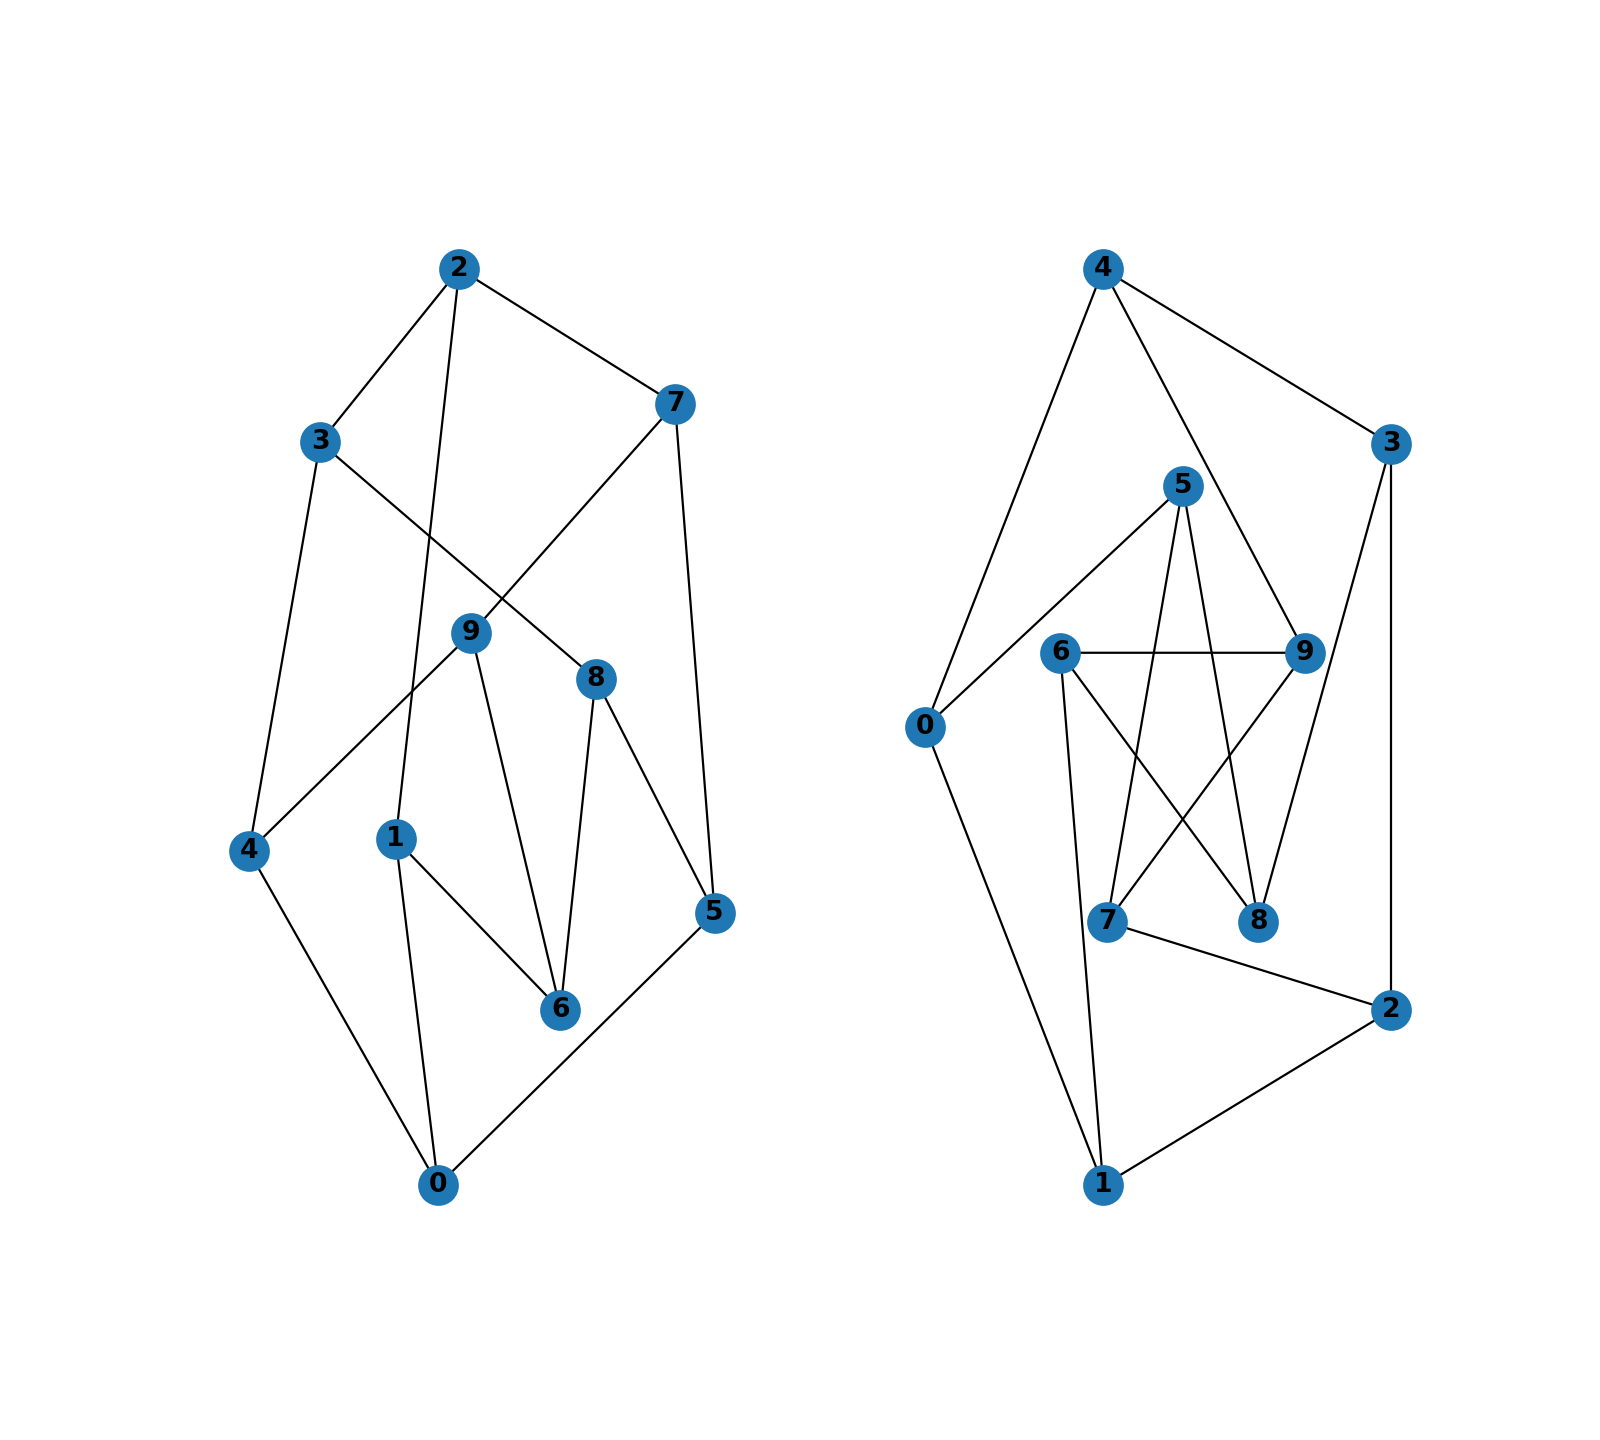

In [16]:
plt.figure(figsize=(10,9))

G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [9]:
# See what layouts are available in networkX
[x for x in nx.__dir__() if x.endswith('_layout')]

['bipartite_layout',
 'circular_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'planar_layout',
 'fruchterman_reingold_layout',
 'spiral_layout',
 'multipartite_layout']

In [ ]:
# Draw the graph using the random layout
plt.figure(figsize=(10,9))
pos = nx.random_layout(G)
nx.draw_random(G, pos)

In [82]:
node_lists = [{0: dict(x_min=x_min, x_max=x_max, 
                       y_min=y_min, y_max=y_max)}]

d = 0

In [83]:
d += 1
for  

1

In [ ]:
# Draw the graph using the circular layout
plt.figure(figsize=(10,9))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos)

In [ ]:
# Draw the graph using custom node positions
plt.figure(figsize=(10,7))

pos = nx.get_node_attributes(G, 'location')
nx.draw_networkx(G, pos)

In [ ]:
# Draw the graph adding alpha, removing labels, and softening edge color
plt.figure(figsize=(10,7))

nx.draw_networkx(G, pos, alpha=0.7, with_labels=False, edge_color='.4')

plt.axis('off')
plt.tight_layout();

In [ ]:
# Draw graph with varying node color, node size, and edge width
plt.figure(figsize=(10,7))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)

plt.axis('off')
plt.tight_layout();

In [ ]:
# Draw specific edges and add labels to specific nodes
plt.figure(figsize=(10,7))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)


greater_than_770 = [x for x in G.edges(data=True) if x[2]['weight']>770]
nx.draw_networkx_edges(G, pos, edgelist=greater_than_770, edge_color='r', alpha=0.4, width=6)

nx.draw_networkx_labels(G, pos, labels={'Los Angeles, CA': 'LA', 'New York, NY': 'NYC'}, font_size=18, font_color='w')

plt.axis('off')
plt.tight_layout();

In [23]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

<IPython.core.display.Javascript object>


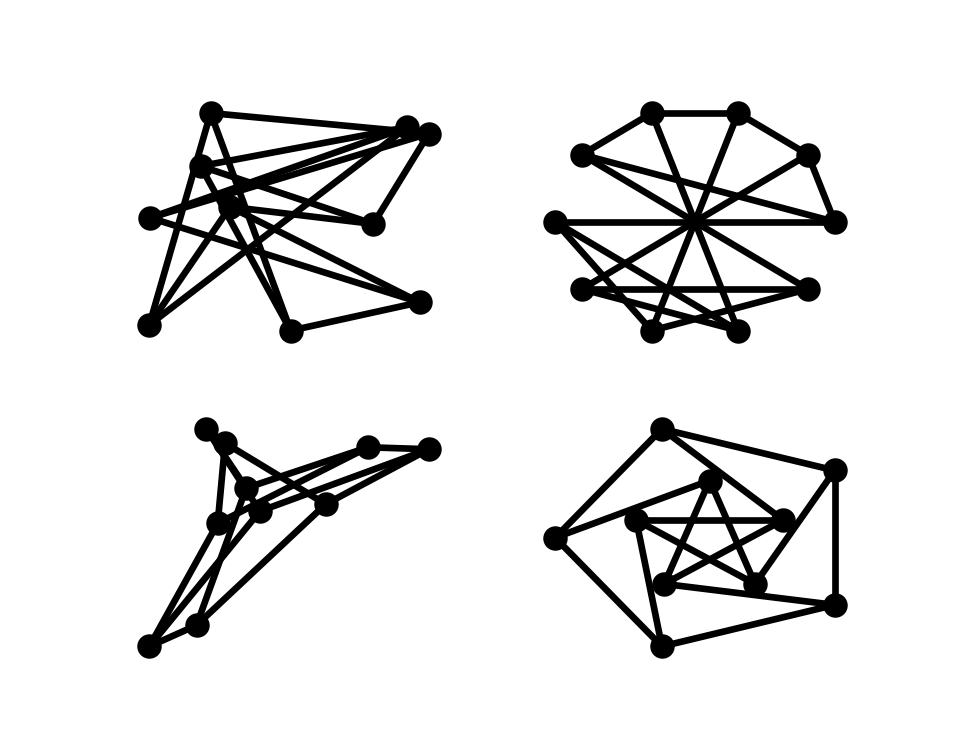

In [26]:
plt.figure(figsize=(6,4.7))

options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

# Assignment 2 - Network Connectivity

In this assignment you will go through the process of importing and analyzing an internal email communication network between employees of a mid-sized manufacturing company. 
Each node represents an employee and each directed edge between two nodes represents an individual email. The left node represents the sender and the right node represents the recipient.

In [ ]:
#

In [ ]:
1. 408/483
2. 

In [40]:
import networkx as nx

# This line must be commented out when submitting to the autograder
#!head email_network.txt

### Question 1

Using networkx, load up the directed multigraph from `email_network.txt`. Make sure the node names are strings.

*This function should return a directed multigraph networkx graph.*

In [4]:
def answer_one():
    
    # Your Code Here
    G = nx.read_edgelist('email_network.txt', delimiter='\t', data=[('time', int)], create_using=nx.MultiDiGraph())
    return G # Your Answer Here

### Question 2

How many employees and emails are represented in the graph from Question 1?

*This function should return a tuple (#employees, #emails).*

In [5]:
def answer_two():
        
    G = answer_one()
    
    return len(G.nodes()), len(G.edges())

In [9]:
answer_two()

(167, 82927)

### Question 3

* Part 1. Assume that information in this company can only be exchanged through email.

    When an employee sends an email to another employee, a communication channel has been created, allowing the sender to provide information to the receiver, but not vice versa. 

    Based on the emails sent in the data, is it possible for information to go from every employee to every other employee?


* Part 2. Now assume that a communication channel established by an email allows information to be exchanged both ways. 

    Based on the emails sent in the data, is it possible for information to go from every employee to every other employee?


*This function should return a tuple of bools (part1, part2).*

In [6]:
def answer_three():
    # Your Code Here
    G = answer_one()
    return nx.is_strongly_connected(G), nx.is_connected(G.to_undirected())# Your Answer Here

In [8]:
answer_three()

(False, True)

### Question 4

How many nodes are in the largest (in terms of nodes) weakly connected component?

*This function should return an int.*

In [27]:
G = answer_one()
wccs = nx.weakly_connected_components(G)

In [28]:
def answer_four():
    # Your Code Here
    G = answer_one()
    wccs = nx.weakly_connected_components(G)
    
    return len(max(wccs, key=len))# Your Answer Here

In [29]:
answer_four()

167

### Question 5

How many nodes are in the largest (in terms of nodes) strongly connected component?

*This function should return an int*

In [30]:
def answer_five():
        
    # Your Code Here
    G = answer_one()
    sccs = nx.strongly_connected_components(G)
    
    return len(max(sccs, key=len))

In [31]:
answer_five()

126

### Question 6

Using the NetworkX function strongly_connected_component_subgraphs, find the subgraph of nodes in a largest strongly connected component. 
Call this graph G_sc.

*This function should return a networkx MultiDiGraph named G_sc.*

In [43]:
def answer_six():
        
    # Your Code Here
    G = answer_one()
    scc_subs = (G.subgraph(c) for c in nx.strongly_connected_components(G))
    G_sc = max(scc_subs, key=len)
    
    return G_sc # Your Answer Here

In [45]:
answer_six()

### Question 7

What is the average distance between nodes in G_sc?

*This function should return a float.*

In [47]:
def answer_seven():
        
    # Your Code Here
    G = answer_six()
    return nx.average_shortest_path_length(G) # Your Answer Here

In [48]:
answer_seven()

1.6461587301587302

### Question 8

What is the largest possible distance between two employees in G_sc?

*This function should return an int.*

In [49]:
def answer_eight():
    G = answer_six()
    return nx.diameter(G)

In [50]:
answer_eight()

3

### Question 9

What is the set of nodes in G_sc with eccentricity equal to the diameter?

*This function should return a set of the node(s).*

In [51]:
def answer_nine():
    G = answer_six()
    return set(nx.periphery(G))

In [52]:
answer_eight()

3

### Question 10

What is the set of node(s) in G_sc with eccentricity equal to the radius?

*This function should return a set of the node(s).*

In [53]:
def answer_ten():
        
    # Your Code Here
    G = answer_six()
    return set(nx.center(G)) # Your Answer Here

### Question 11

Which node in G_sc is connected to the most other nodes by a shortest path of length equal to the diameter of G_sc?

How many nodes are connected to this node?


*This function should return a tuple (name of node, number of satisfied connected nodes).*

In [54]:
def answer_eleven():
    
    G = answer_six()
    d = nx.diameter(G)
    peripheries = nx.periphery(G)
    max_count = -1
    result_node = None
    
    for node in peripheries:
        count = 0
        sp = nx.shortest_path_length(G, node)
        for key, value in sp.items():
            if value == d:
                count += 1        
        if count > max_count:
            result_node = node
            max_count = count

    return result_node, max_count

In [55]:
answer_eleven()

('97', 63)

### Question 12

Suppose you want to prevent communication from flowing to the node that you found in the previous question from any node in the center of G_sc, what is the smallest number of nodes you would need to remove from the graph (you're not allowed to remove the node from the previous question or the center nodes)? 

*This function should return an integer.*

In [56]:
def answer_twelve():
    G = answer_six()
    center = nx.center(G)[0]
    node = answer_eleven()[0]
    return len(nx.minimum_node_cut(G, center, node))

In [57]:
answer_twelve()

0

### Question 13

Construct an undirected graph G_un using G_sc (you can ignore the attributes).

*This function should return a networkx Graph.*

In [ ]:
def answer_thirteen():
        
    # Your Code Here
    G = answer_six()
    undir_subgraph = G.to_undirected()
    G_un = nx.Graph(undir_subgraph)
    return G_un # Your Answer Here

### Question 14

What is the transitivity and average clustering coefficient of graph G_un?

*This function should return a tuple (transitivity, avg clustering).*

In [ ]:
def answer_fourteen():
        
    # Your Code Here
    G = answer_thirteen()
    return nx.transitivity(G), nx.average_clustering(G) # Your Answer Here